<a href="https://colab.research.google.com/github/KeyMoney22/Flu-Shot-Learning/blob/main/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing relevant Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder

# Mounting our drive

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Understanding**

In [2]:
#Importing our data
df_train_features = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines/training_set_features.csv')
df_train_labels = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines/training_set_labels.csv')


In [3]:
# Displaying the snapshot of out train_labels dataframe
df_train_labels.head()

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0

In [4]:
# Displaying summary info of our train_labels dataframe
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [5]:
df_train_features.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...             income_poverty  marital_status  \
0                    1.0  ...              Below Poverty     Not Married   
1                    1.0  ...              Below Poverty     Not Married   
2                    0.0  ...  <= $75,000, Above Poverty     Not Married   
3                    0.0  ...              Below Poverty     Not Married   
4                    1.0  ...  <= $75,000, Above Poverty         Married   

   rent_or_own   employment_status  hhs_geo_region                census_msa  \
0          Own  Not in Labor Force        oxchjgsf                   Non-MSA   
1         Rent            Employed        bhuqouqj  MSA, Not Principle  City   
2          Own            Employed        qufhixun  MSA, Not Principle  City   
3         Rent  Not in Labor Force        lrircsnp       MSA, Principle City   
4          Own            Employed        qufhixun  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   
2               2.0                 0.0             rucpziij   
3               0.0                 0.0                  NaN   
4               1.0                 0.0             wxleyezf   

   employment_occupation  
0                    NaN  
1               xgwztkwe  
2               xtkaffoo  
3                    NaN  
4               emcorrxb  

[5 rows x 36 columns]

In [6]:
# Combining the labels and features data frames into one data frame df_train

df_train = pd.merge(df_train_features, df_train_labels, on='respondent_id')
df_train.head()


respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  ...  rent_or_own   employment_status  \
0                    1.0  ...          Own  Not in Labor Force   
1                    1.0  ...         Rent            Employed   
2                    0.0  ...          Own            Employed   
3                    0.0  ...         Rent  Not in Labor Force   
4                    1.0  ...          Own            Employed   

   hhs_geo_region                census_msa  household_adults  \
0        oxchjgsf                   Non-MSA               0.0   
1        bhuqouqj  MSA, Not Principle  City               0.0   
2        qufhixun  MSA, Not Principle  City               2.0   
3        lrircsnp       MSA, Principle City               0.0   
4        qufhixun  MSA, Not Principle  City               1.0   

   household_children  employment_industry  employment_occupation  \
0                 0.0                  NaN                    NaN   
1                 0.0             pxcmvdjn               xgwztkwe   
2                 0.0             rucpziij               xtkaffoo   
3                 0.0                  NaN                    NaN   
4                 0.0             wxleyezf               emcorrxb   

   h1n1_vaccine  seasonal_vaccine  
0             0                 0  
1             0                 1  
2             0                 0  
3             0                 1  
4             0                 0  

[5 rows x 38 columns]

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

## **Data Cleaning**

In [8]:
# Create a copy of the dataframe to avoid modifying the original
df_train_copy = df_train.copy()

<Figure size 800x600 with 0 Axes>

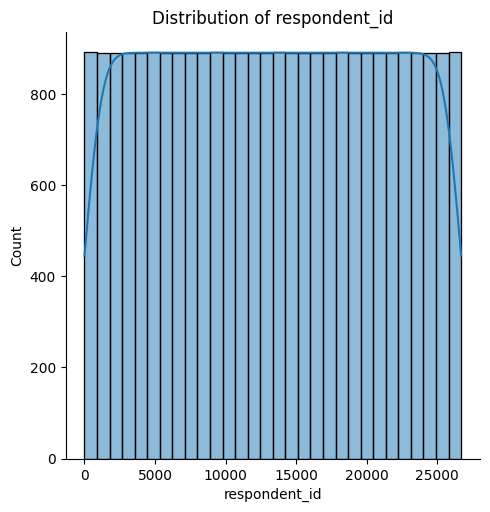

<Figure size 800x600 with 0 Axes>

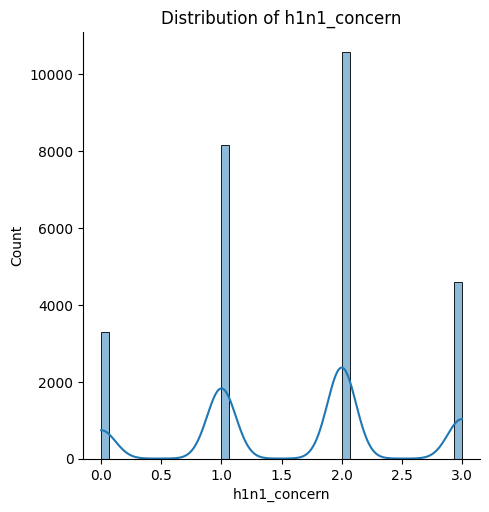

<Figure size 800x600 with 0 Axes>

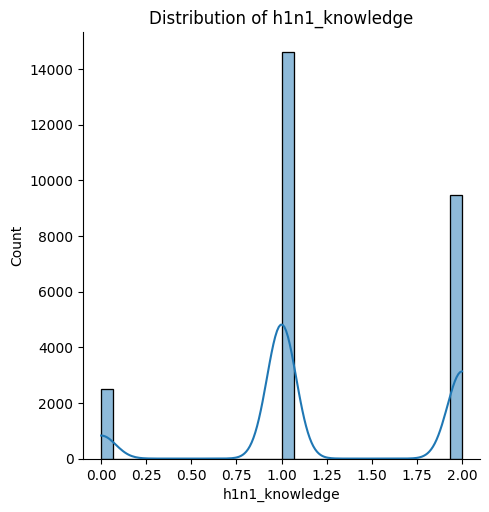

<Figure size 800x600 with 0 Axes>

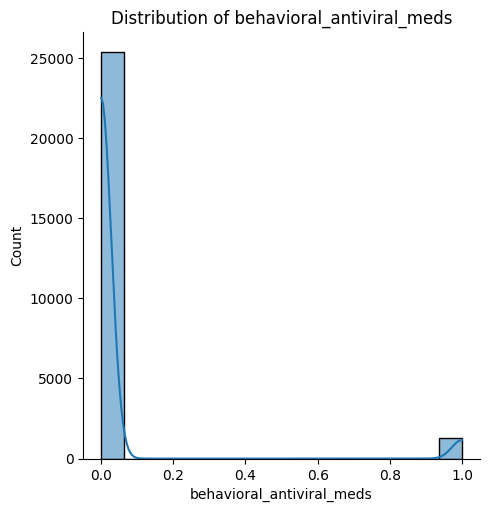

<Figure size 800x600 with 0 Axes>

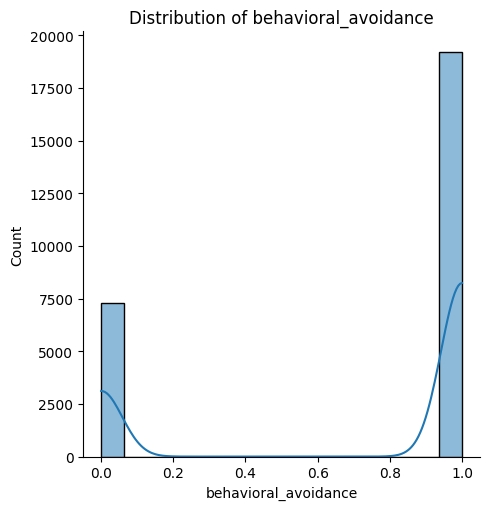

<Figure size 800x600 with 0 Axes>

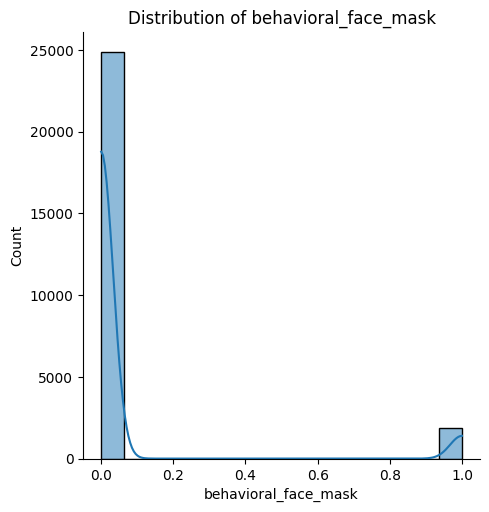

<Figure size 800x600 with 0 Axes>

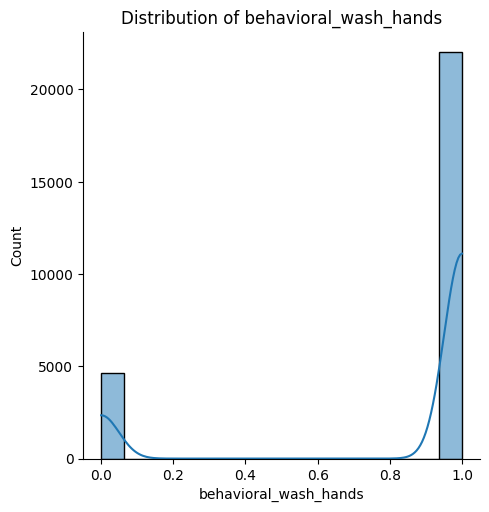

<Figure size 800x600 with 0 Axes>

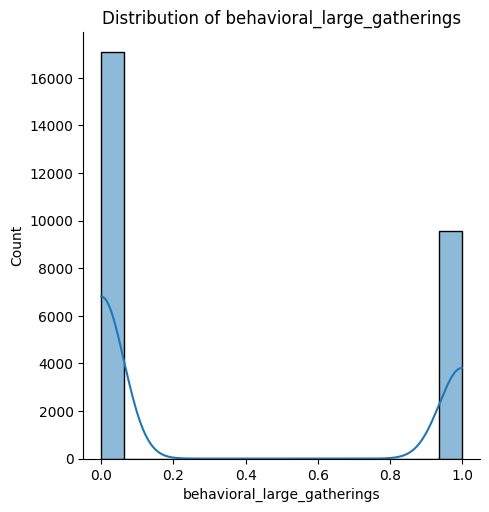

<Figure size 800x600 with 0 Axes>

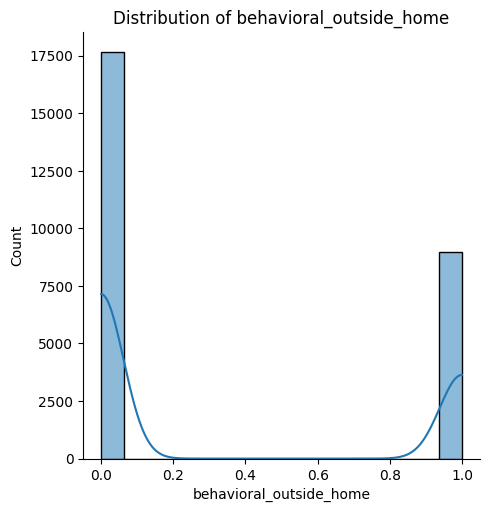

<Figure size 800x600 with 0 Axes>

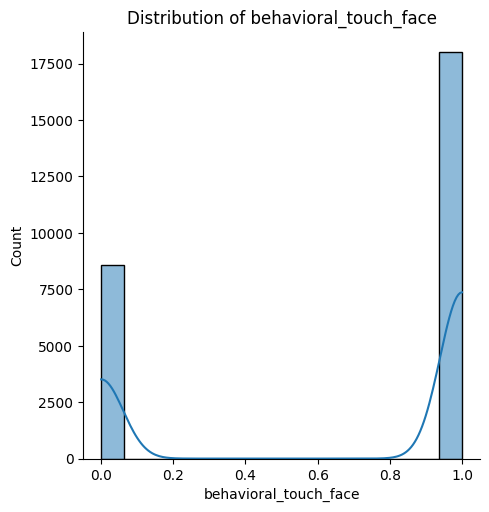

<Figure size 800x600 with 0 Axes>

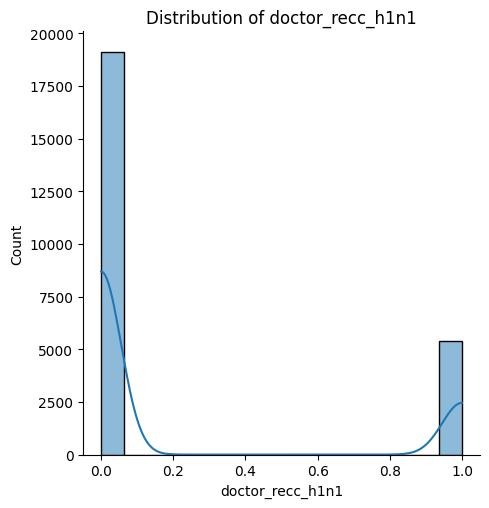

<Figure size 800x600 with 0 Axes>

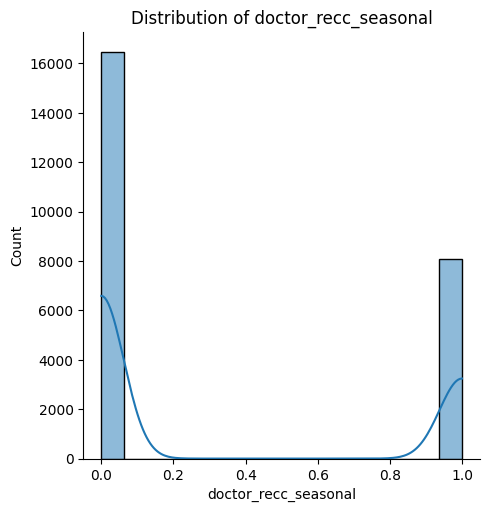

<Figure size 800x600 with 0 Axes>

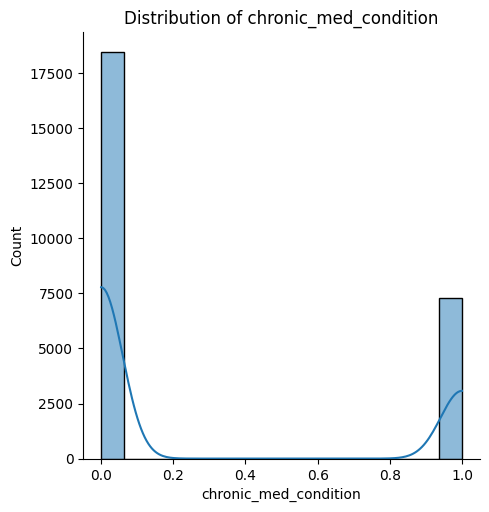

<Figure size 800x600 with 0 Axes>

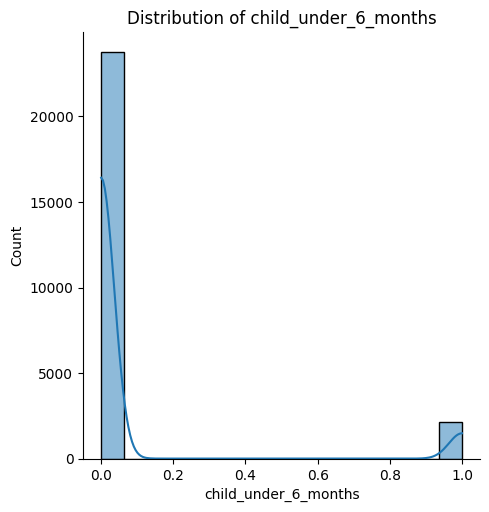

<Figure size 800x600 with 0 Axes>

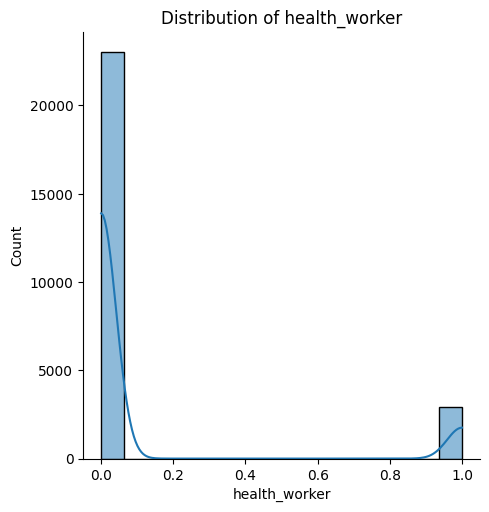

<Figure size 800x600 with 0 Axes>

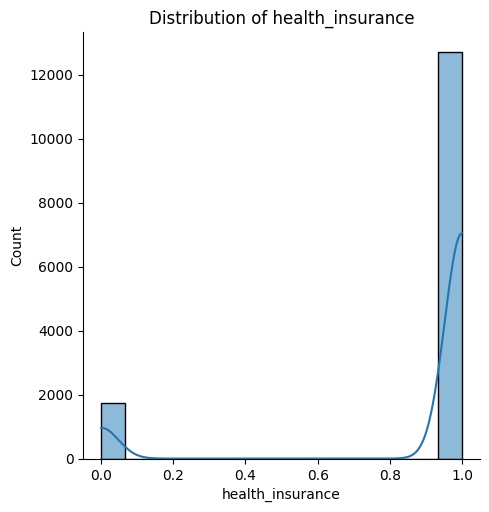

<Figure size 800x600 with 0 Axes>

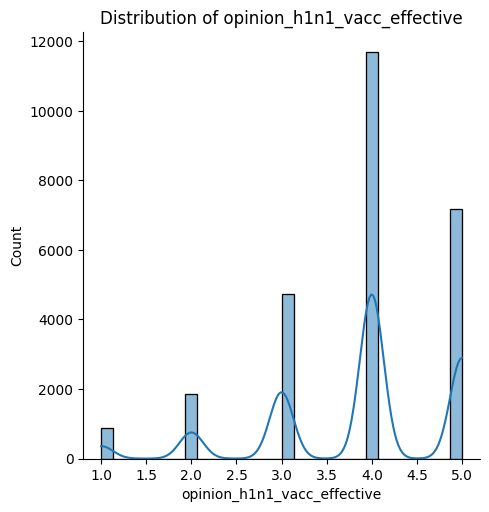

<Figure size 800x600 with 0 Axes>

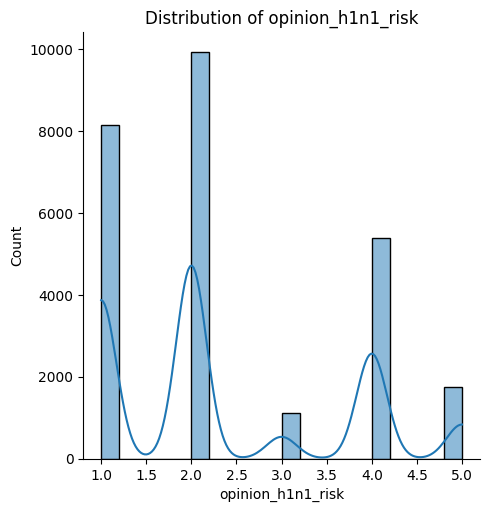

<Figure size 800x600 with 0 Axes>

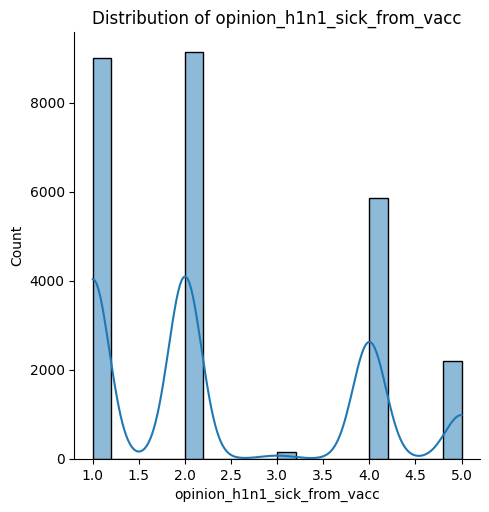

<Figure size 800x600 with 0 Axes>

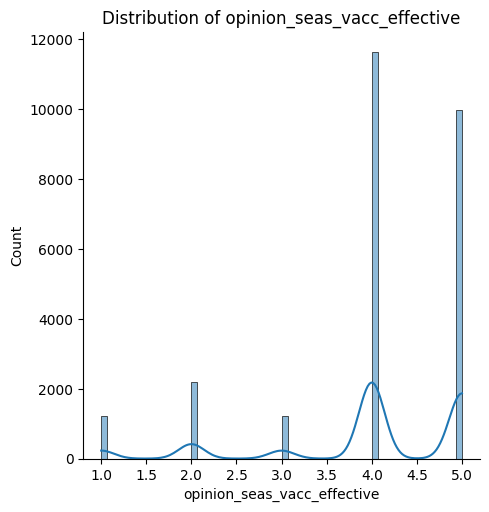

<Figure size 800x600 with 0 Axes>

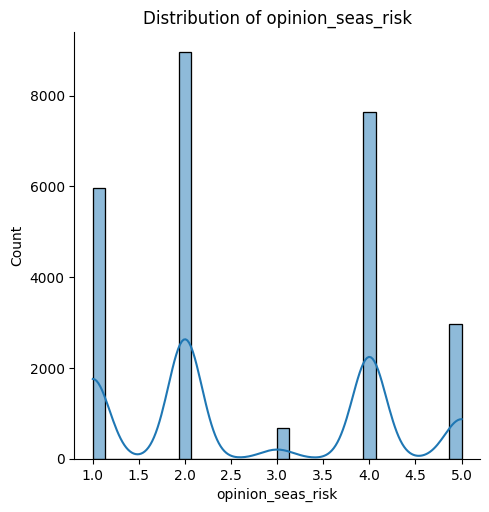

<Figure size 800x600 with 0 Axes>

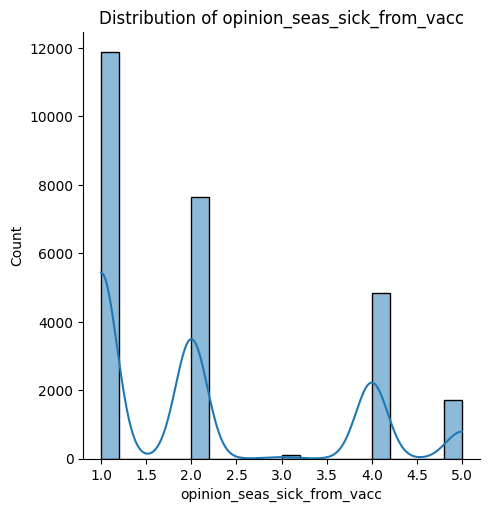

<Figure size 800x600 with 0 Axes>

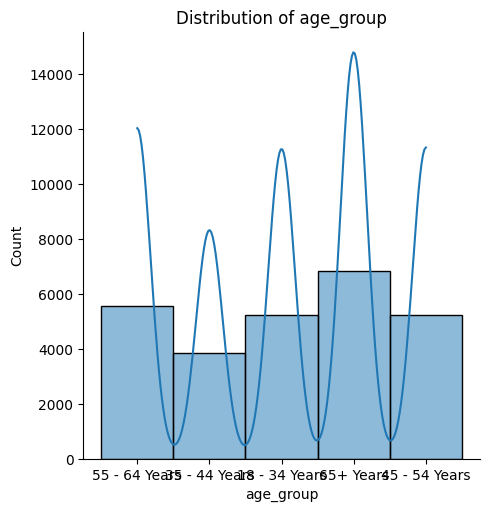

<Figure size 800x600 with 0 Axes>

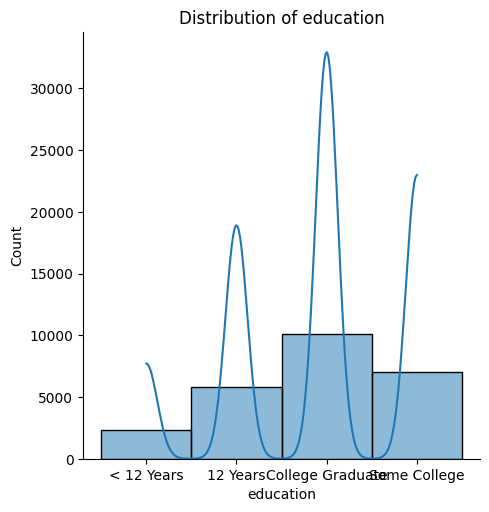

<Figure size 800x600 with 0 Axes>

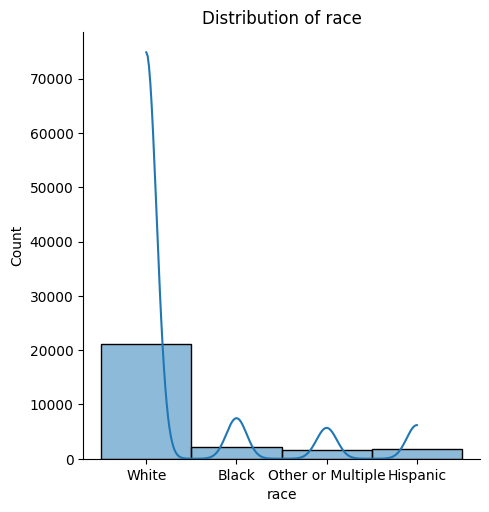

<Figure size 800x600 with 0 Axes>

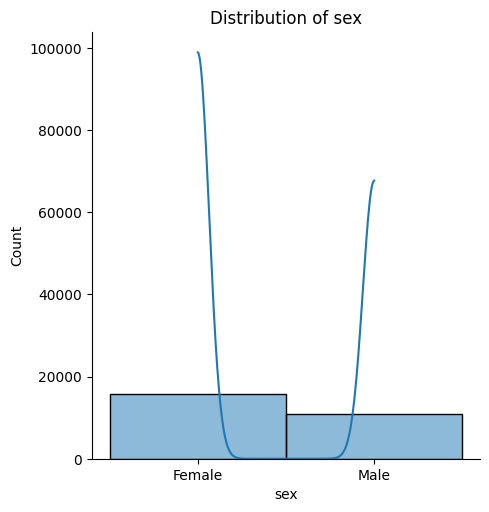

<Figure size 800x600 with 0 Axes>

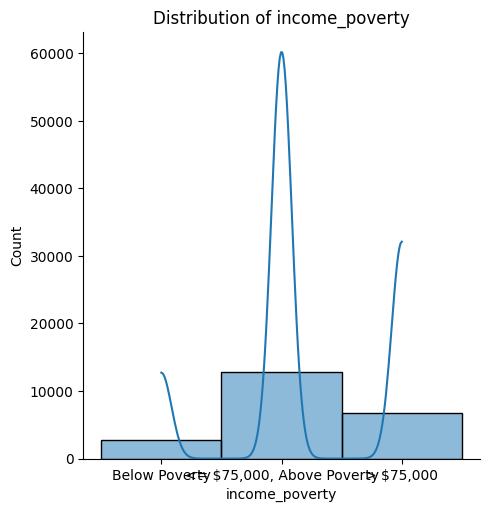

<Figure size 800x600 with 0 Axes>

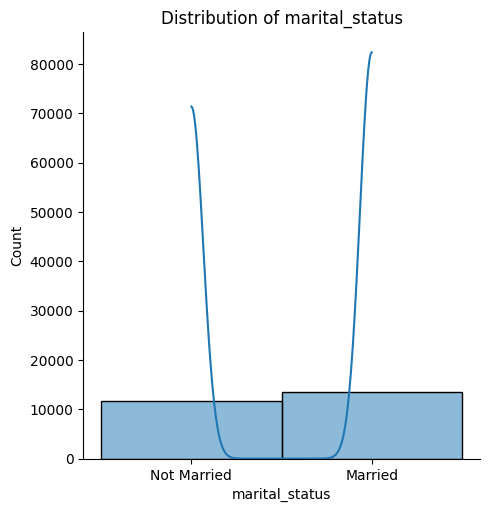

<Figure size 800x600 with 0 Axes>

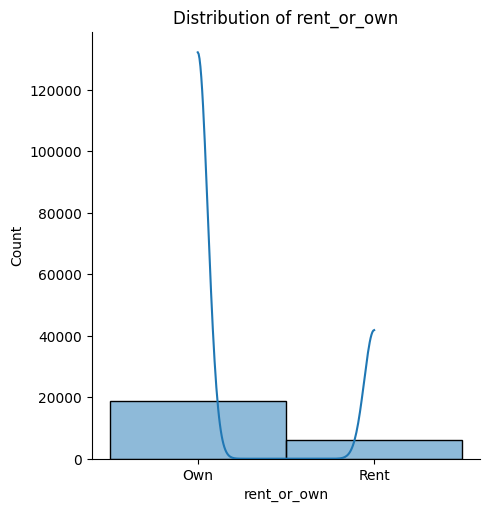

<Figure size 800x600 with 0 Axes>

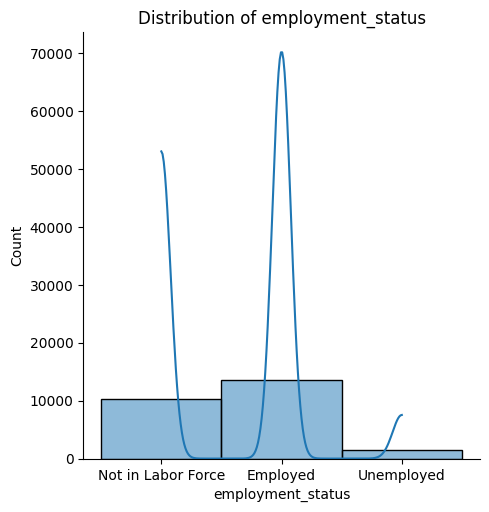

<Figure size 800x600 with 0 Axes>

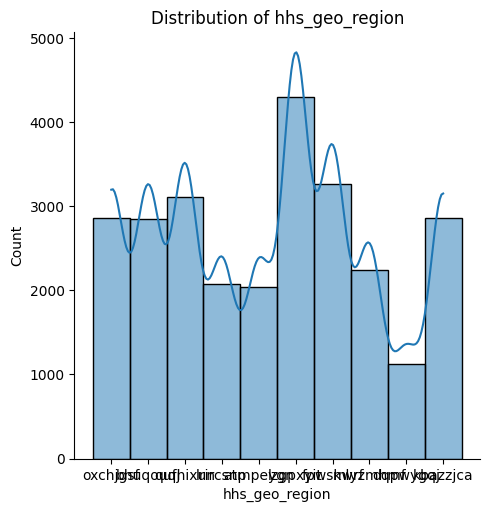

<Figure size 800x600 with 0 Axes>

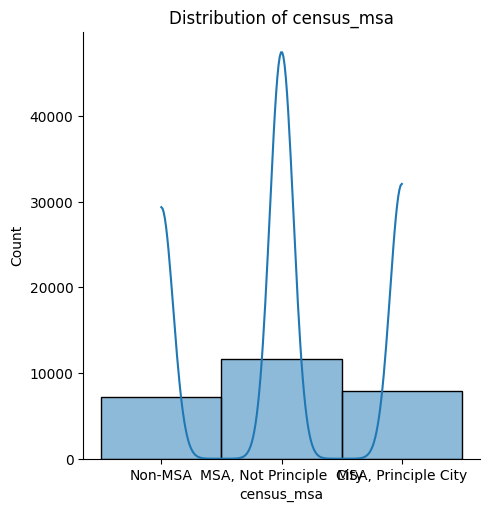

<Figure size 800x600 with 0 Axes>

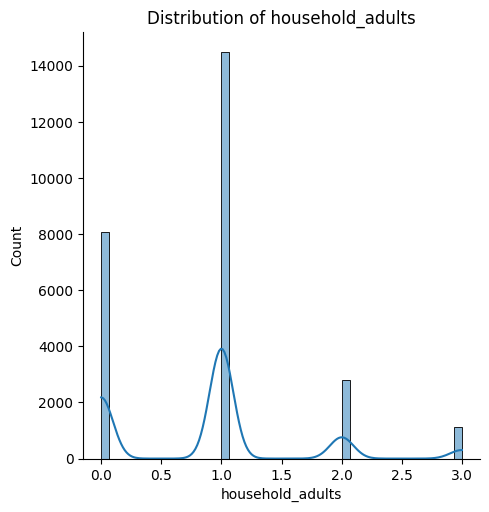

<Figure size 800x600 with 0 Axes>

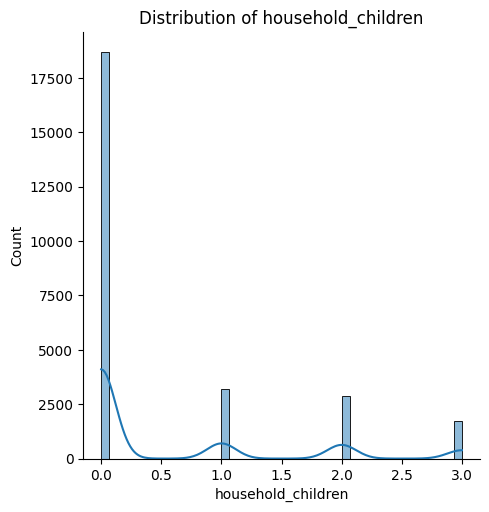

<Figure size 800x600 with 0 Axes>

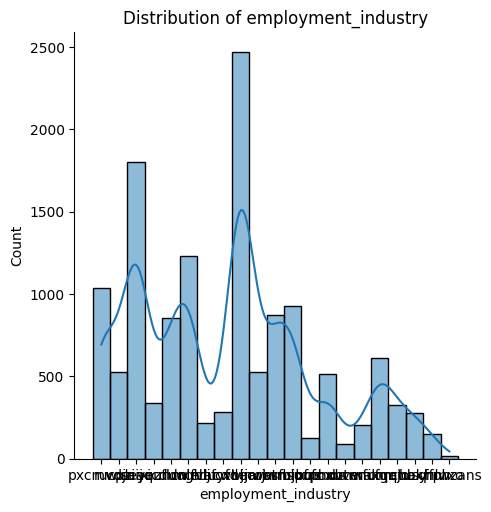

<Figure size 800x600 with 0 Axes>

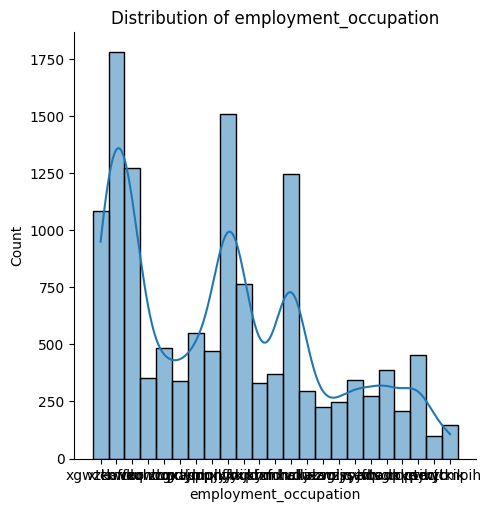

<Figure size 800x600 with 0 Axes>

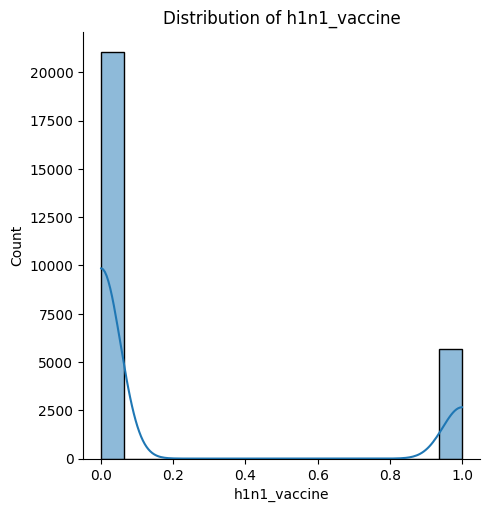

<Figure size 800x600 with 0 Axes>

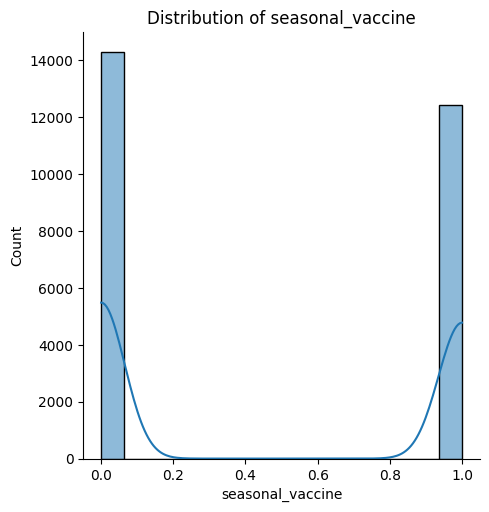

In [9]:
# Loop through each column in df_train
for column in df_train.columns:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  sns.displot(df_train_copy[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.show()


In [10]:
# Checking the data types of our variables
df_train_copy.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status               object
hhs_geo_region                  object
census_msa                      object
household_adults               float64
household_children             float64
employment_industry             object
employment_occupation           object
h1n1_vaccine                     int64
seasonal_vaccine                 int64
dtype: object

In [11]:
df_train_copy.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [12]:
# Checking for Missing values/Entries
df_train_copy.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
household_adults                 249
household_children               249
employment_industry            13330
employment_occupation          13470
h1n1_vaccine                       0
seasonal_vaccine                   0
dtype: int64

In [13]:
# Creating a list of columns with binary inputs
binary_cols = ['behavioral_antiviral_meds',
'behavioral_avoidance',
'behavioral_face_mask',
'behavioral_wash_hands',
'behavioral_large_gatherings',
'behavioral_outside_home',
'behavioral_touch_face',
'doctor_recc_h1n1',
'doctor_recc_seasonal',
'child_under_6_months',
'health_worker',
'health_insurance',
'income_poverty',
'rent_or_own',
'chronic_med_condition']

Since the columns assigned to binary_cols are binary features, we can replace missing values with the most frequent value (mode).
This preserves the distribution of the data while handling missing entries.
We are assuming that the majority of individuals would record either 1 or 0/ yes or no

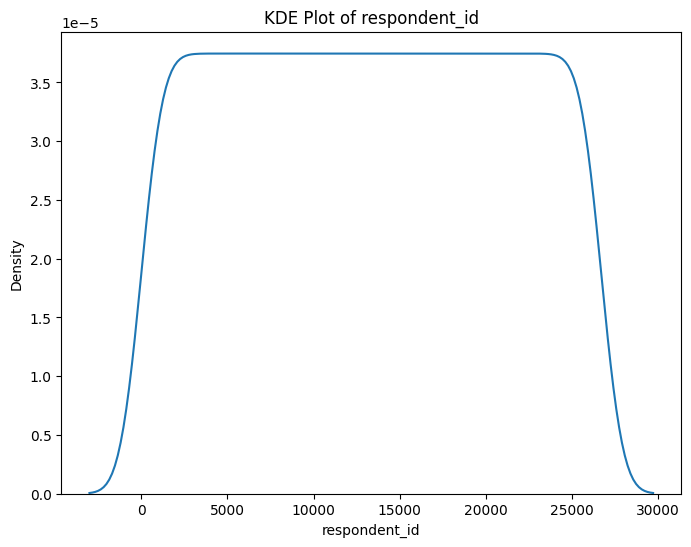

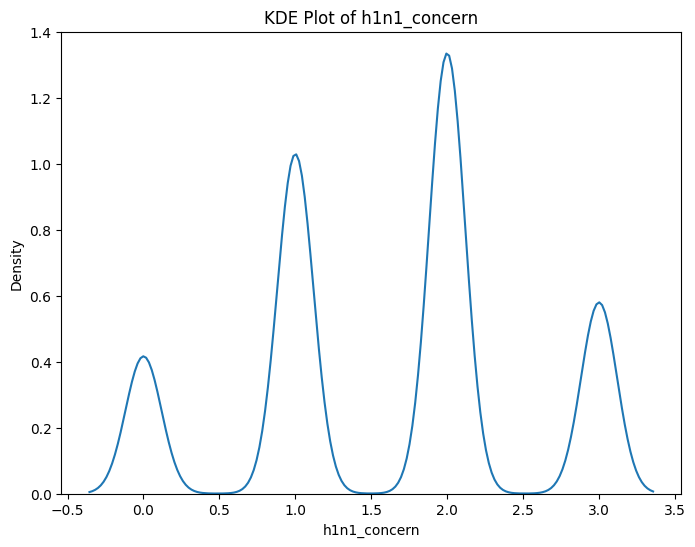

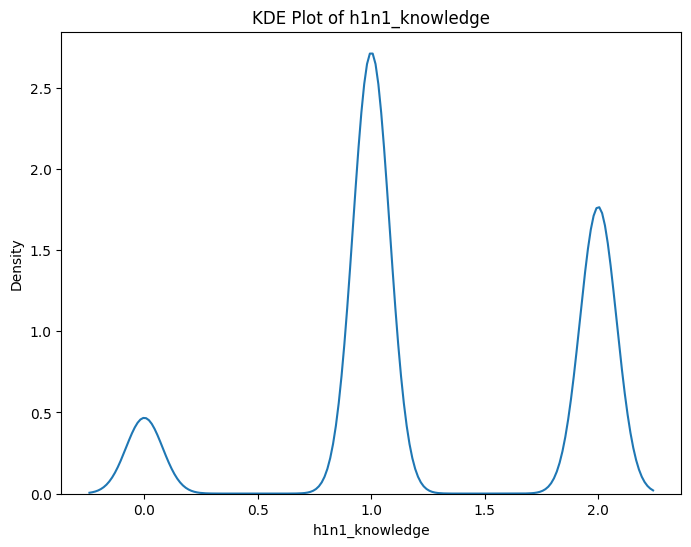

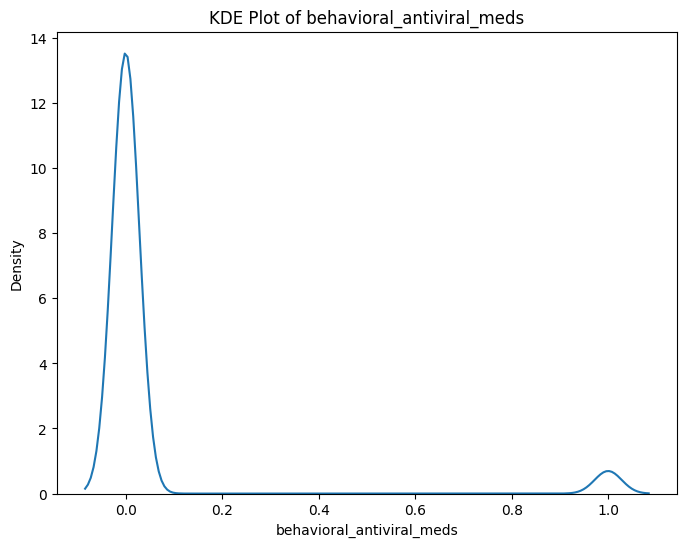

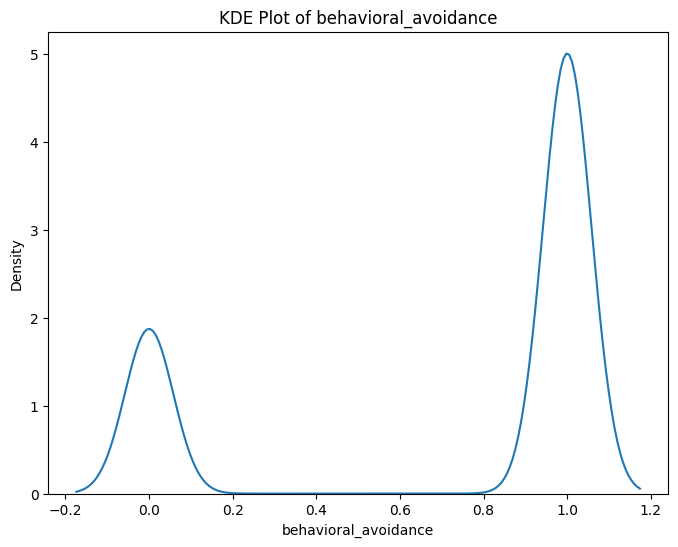

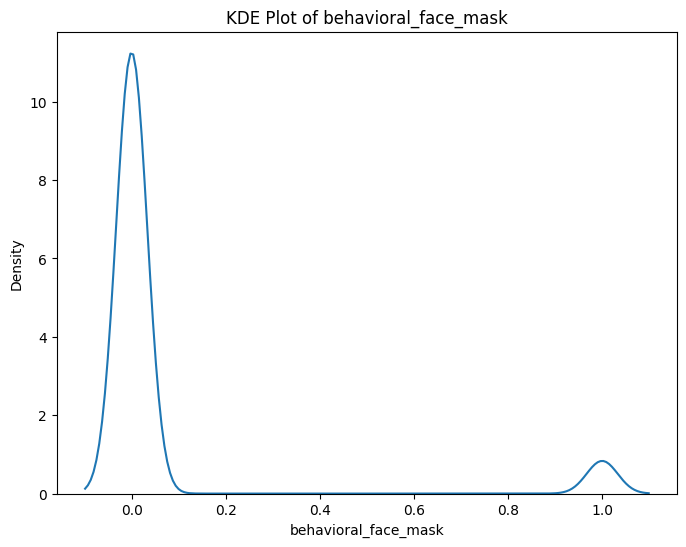

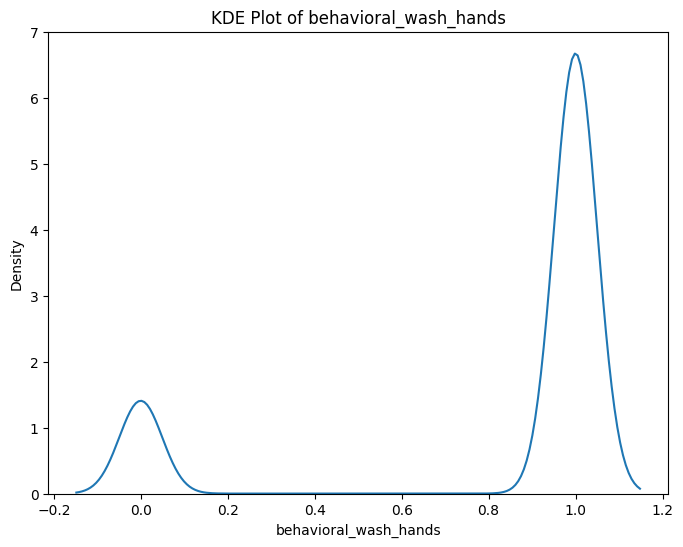

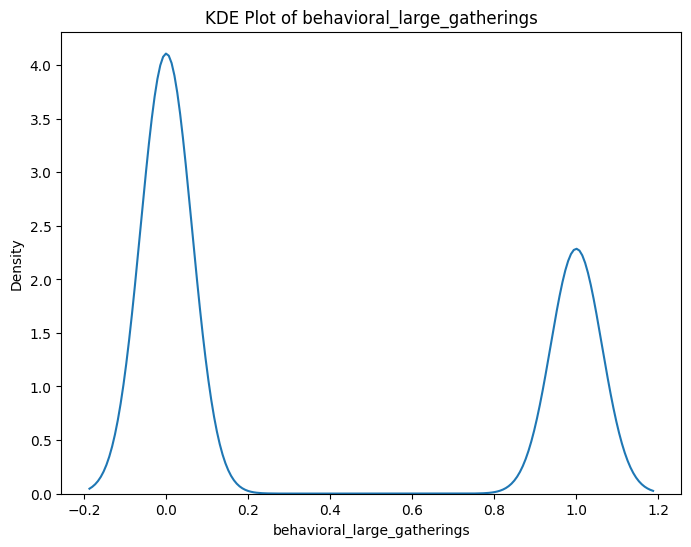

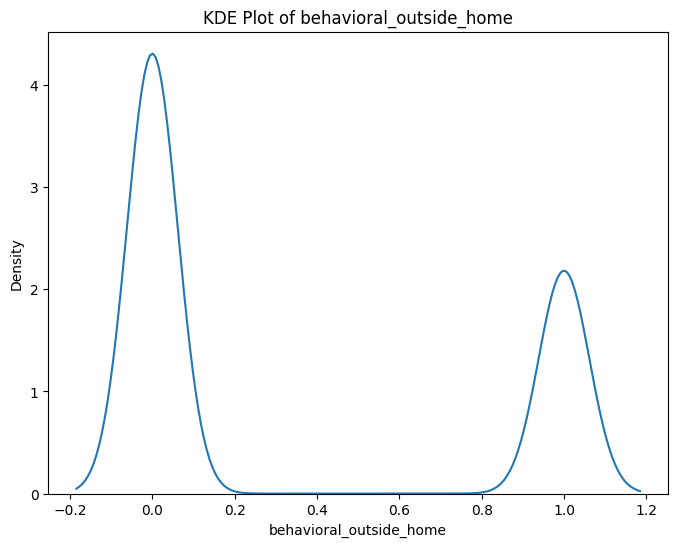

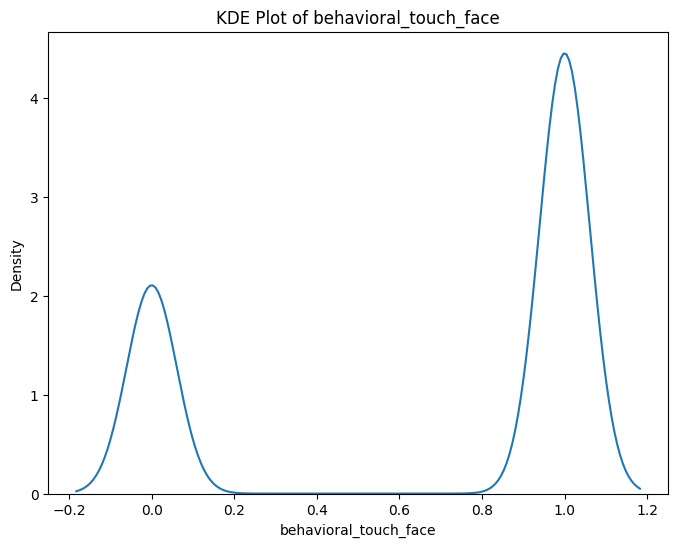

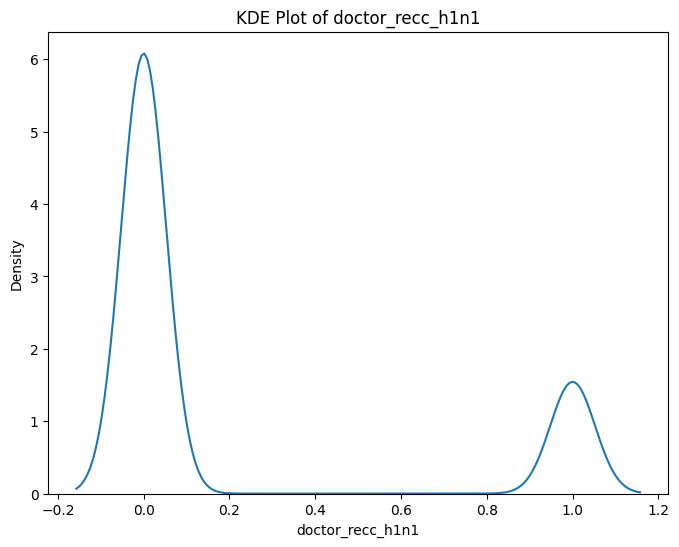

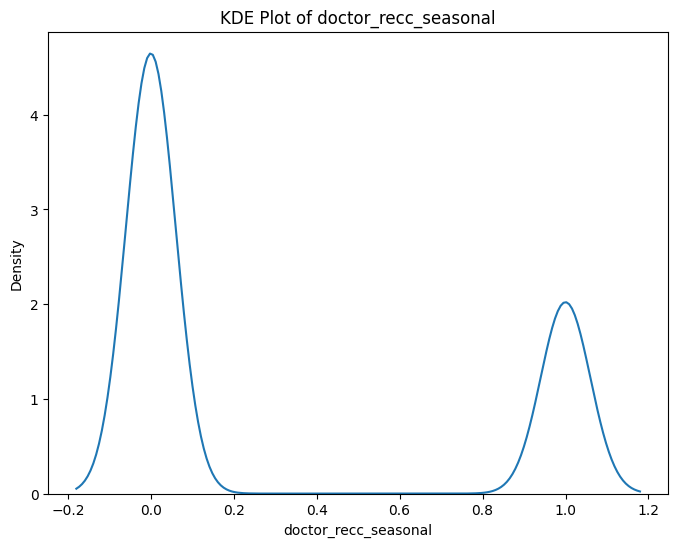

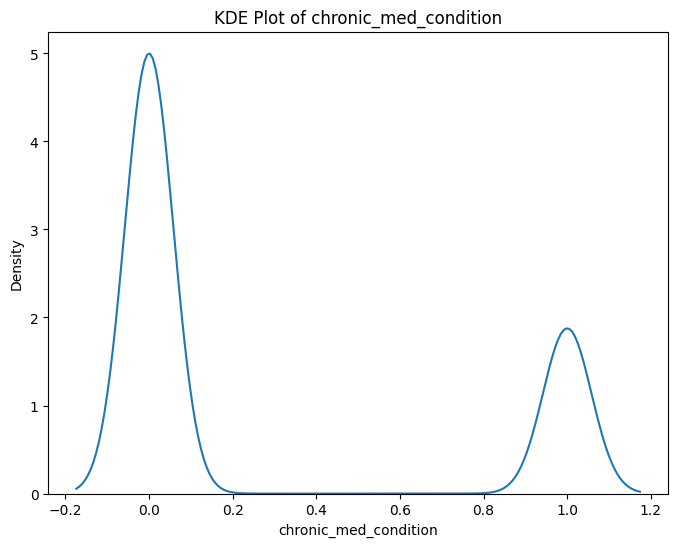

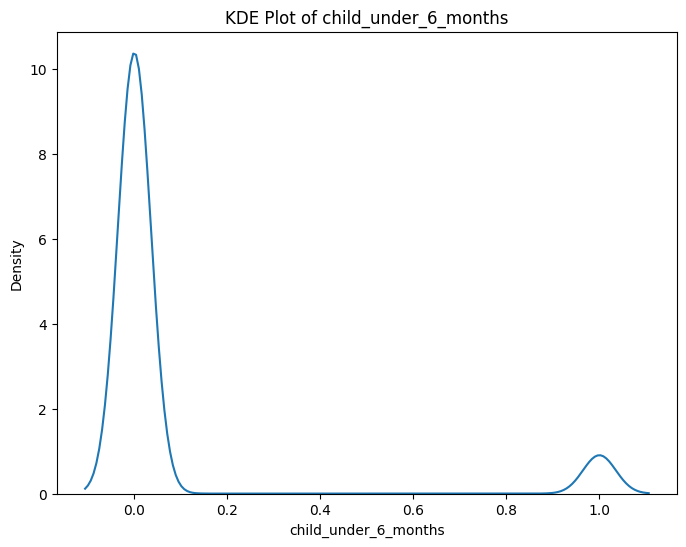

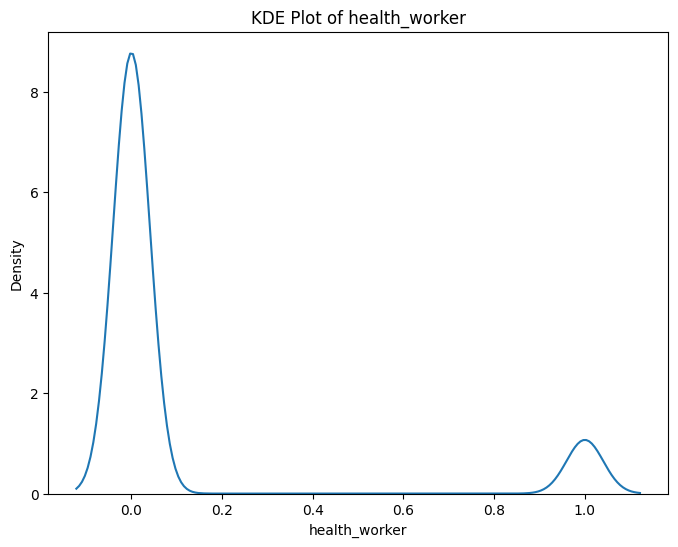

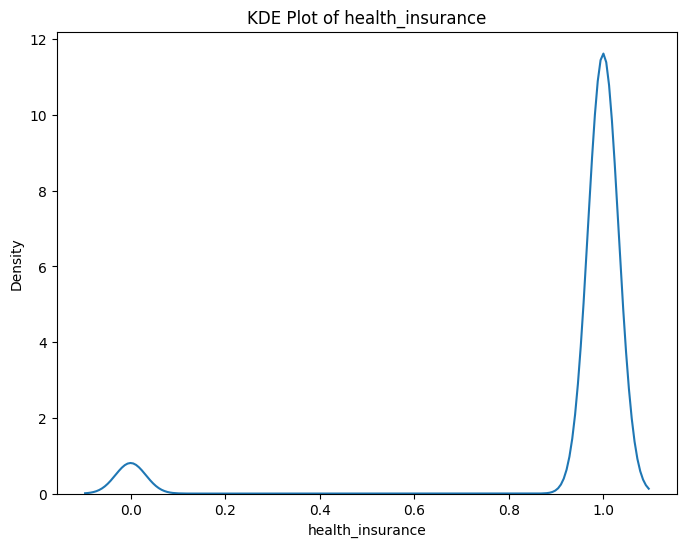

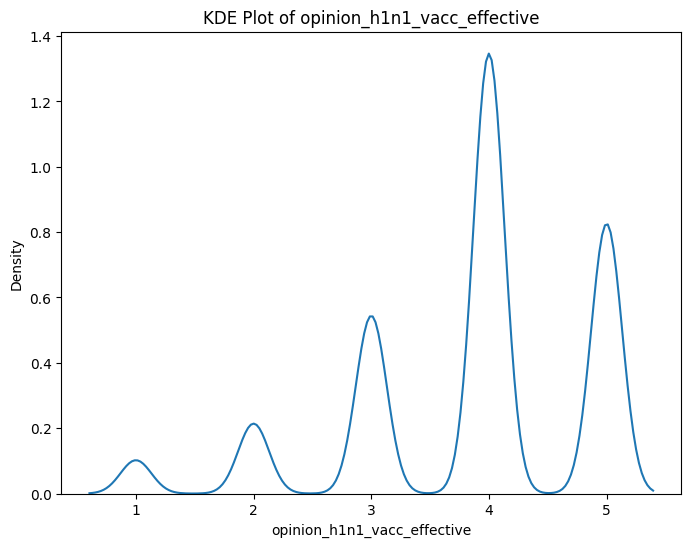

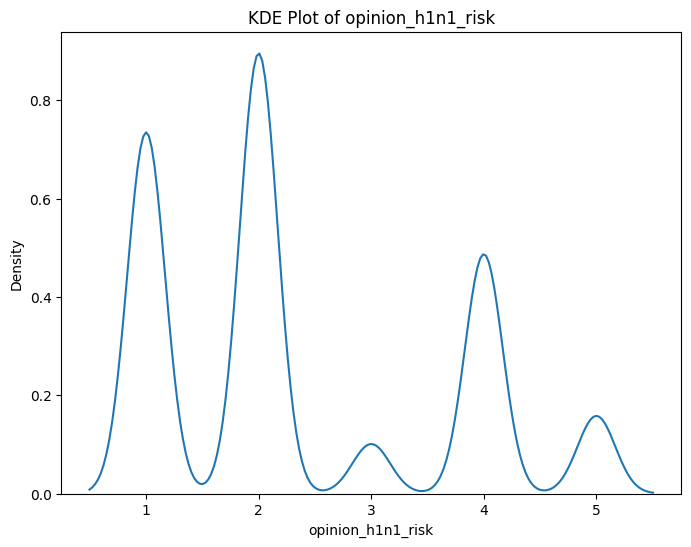

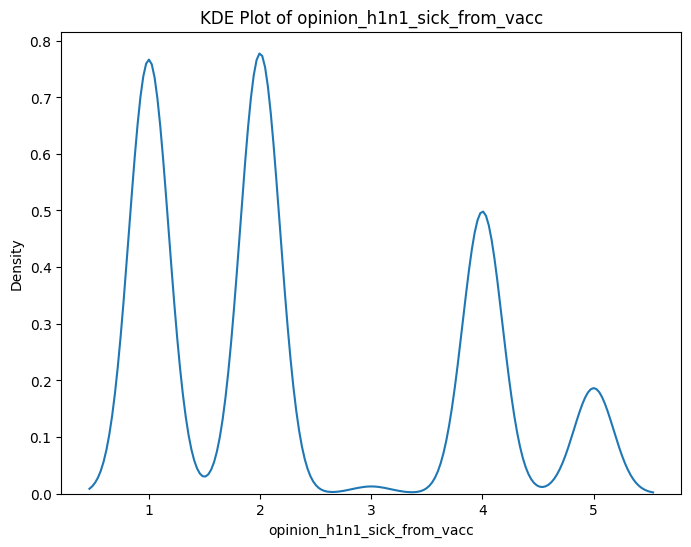

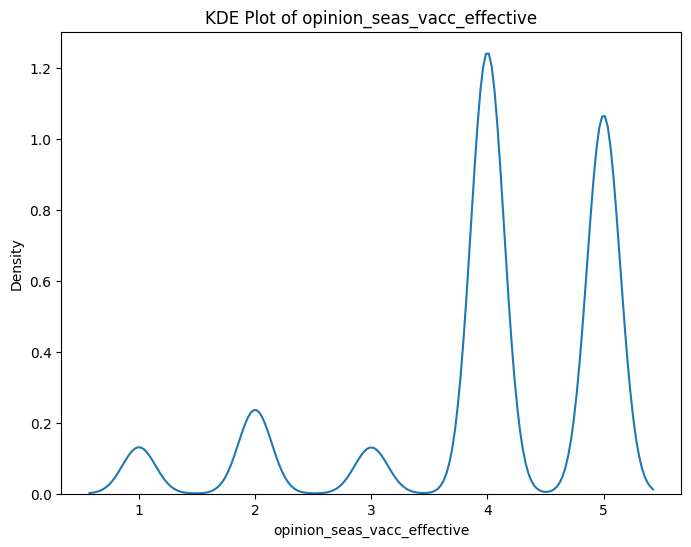

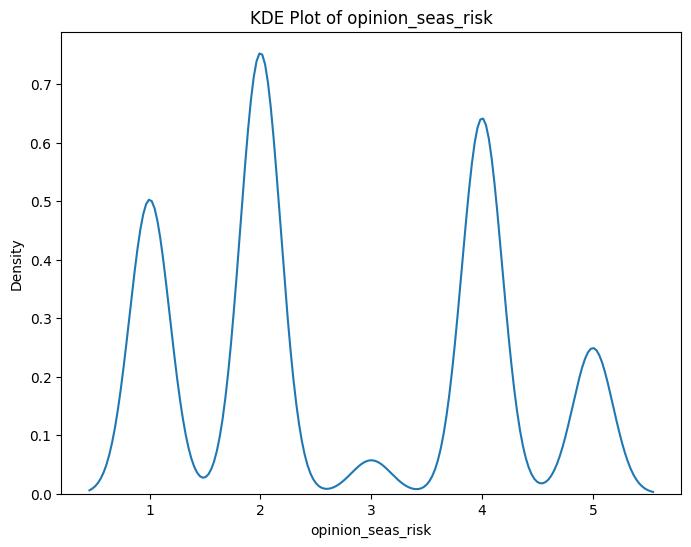

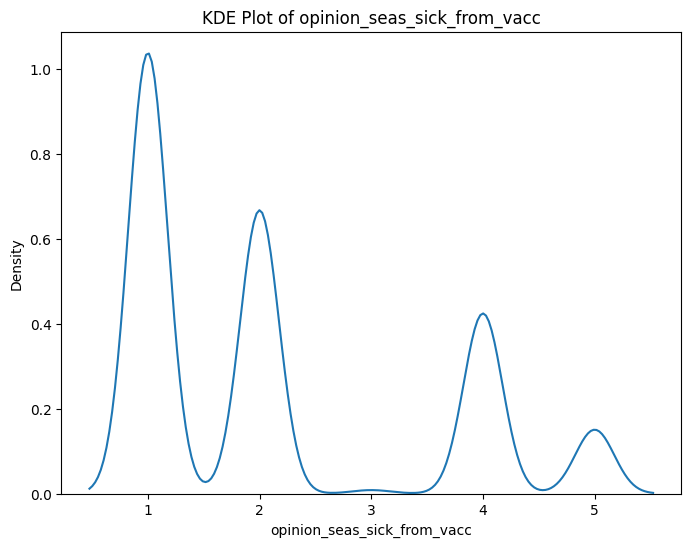

Skipping KDE plot for non-numeric column: age_group


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: education


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: race


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: sex


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: income_poverty


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: marital_status


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: rent_or_own


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: employment_status


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: hhs_geo_region


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: census_msa


<Figure size 800x600 with 0 Axes>

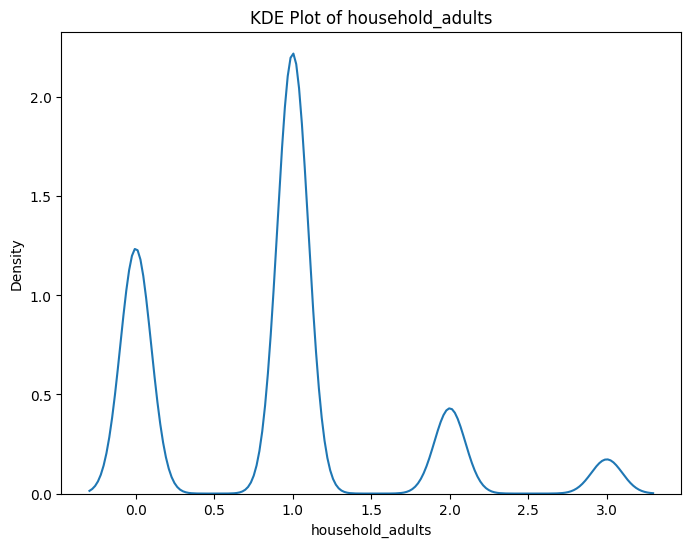

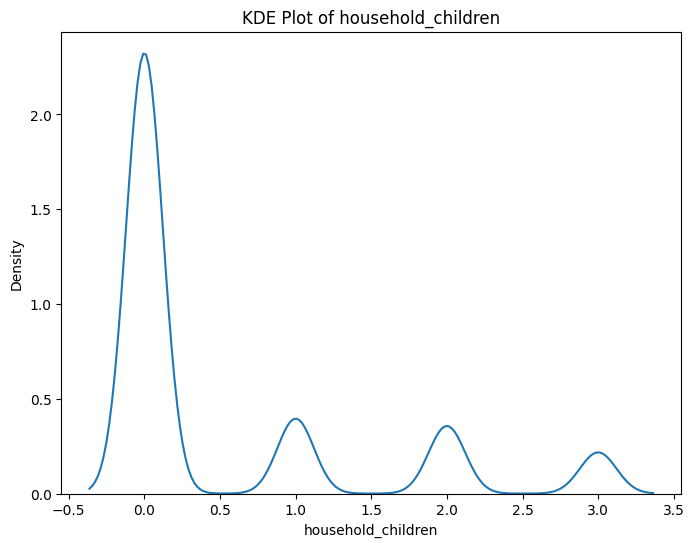

Skipping KDE plot for non-numeric column: employment_industry


<Figure size 800x600 with 0 Axes>

Skipping KDE plot for non-numeric column: employment_occupation


<Figure size 800x600 with 0 Axes>

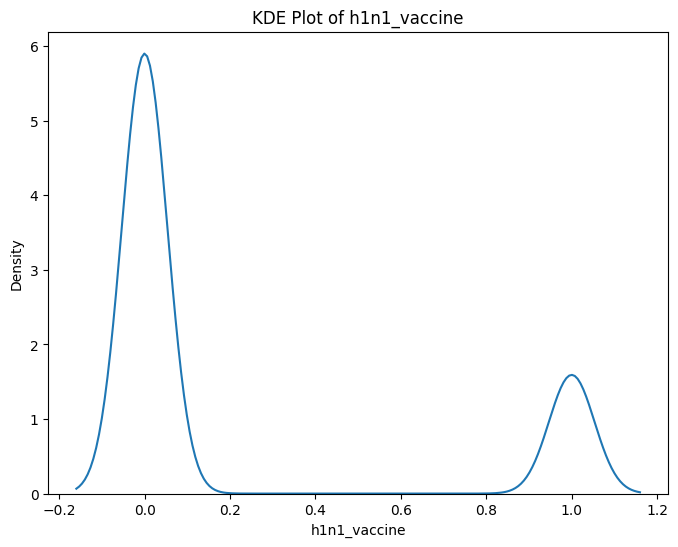

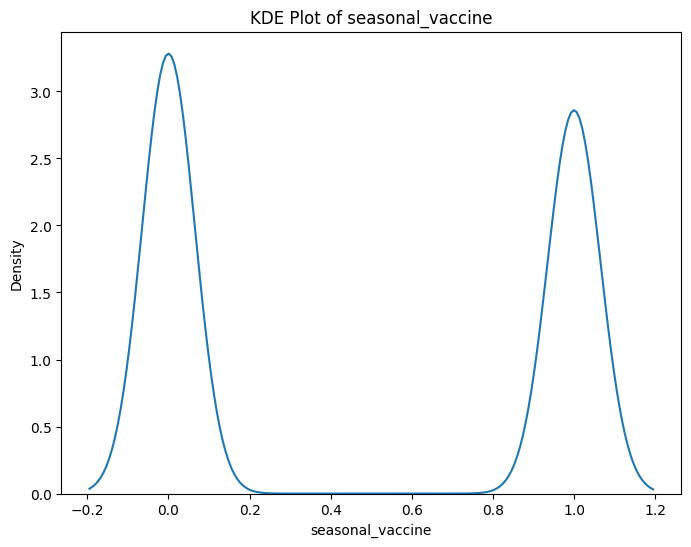

In [14]:
for col in binary_cols:
    df_train_copy[col].fillna(df_train_copy[col].mode()[0], inplace=True)


# Iterate through columns and display KDE plots
for column in df_train_copy.columns:
    plt.figure(figsize=(8, 6))
    if pd.api.types.is_numeric_dtype(df_train_copy[column]):
        sns.kdeplot(df_train_copy[column])
        plt.title(f'KDE Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
    else:
        print(f"Skipping KDE plot for non-numeric column: {column}")
    plt.show()


<Figure size 800x600 with 0 Axes>

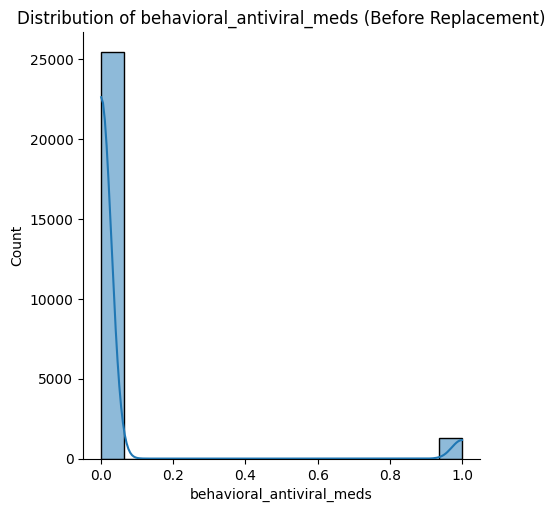

<Figure size 800x600 with 0 Axes>

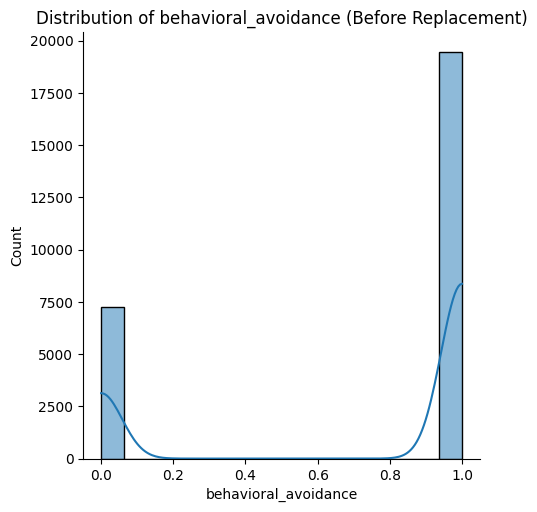

<Figure size 800x600 with 0 Axes>

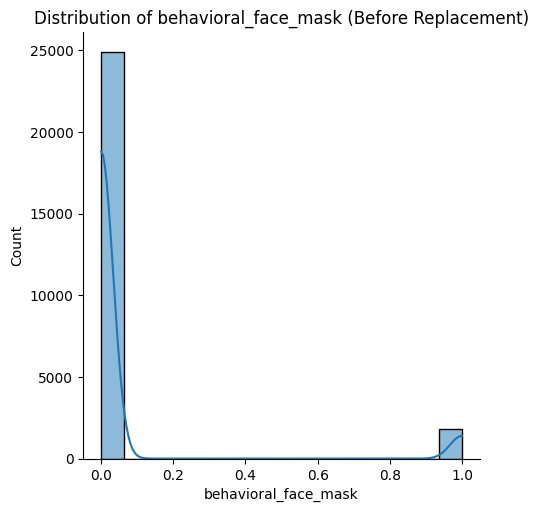

<Figure size 800x600 with 0 Axes>

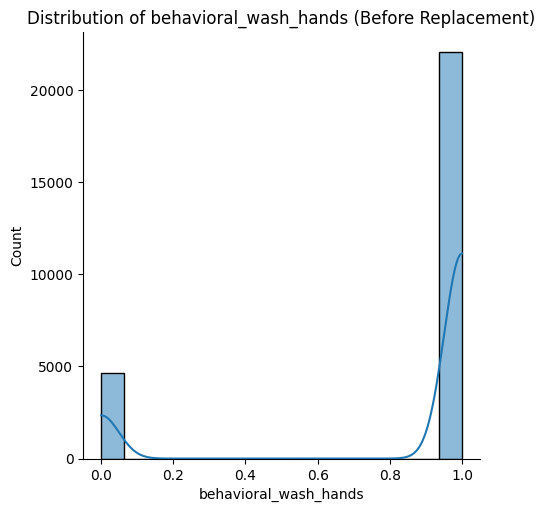

<Figure size 800x600 with 0 Axes>

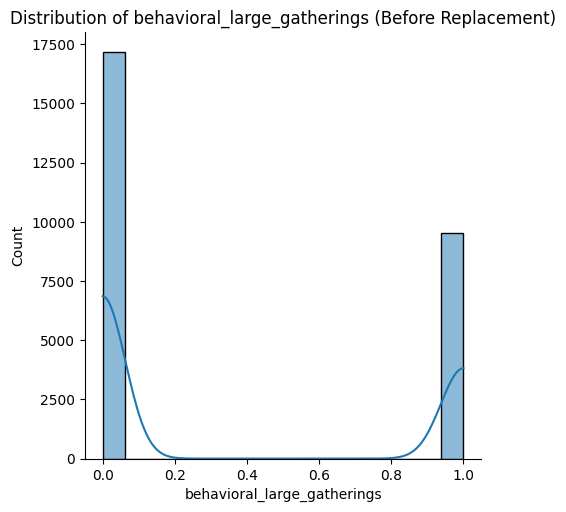

<Figure size 800x600 with 0 Axes>

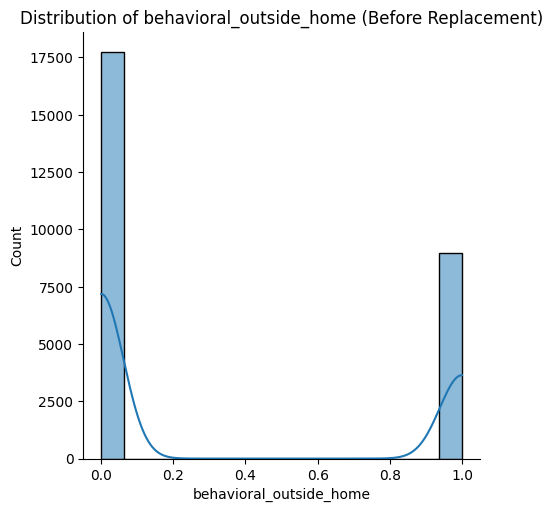

<Figure size 800x600 with 0 Axes>

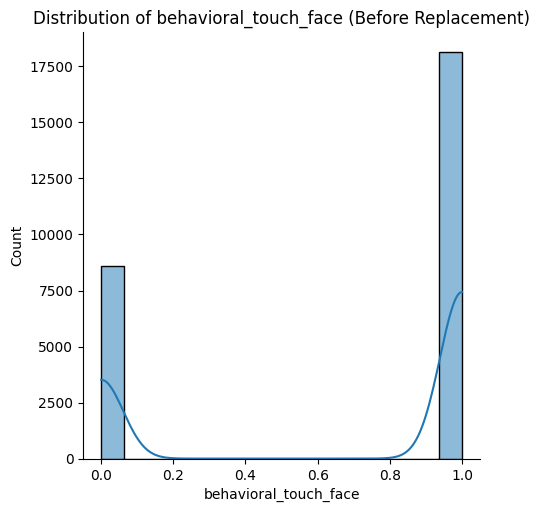

<Figure size 800x600 with 0 Axes>

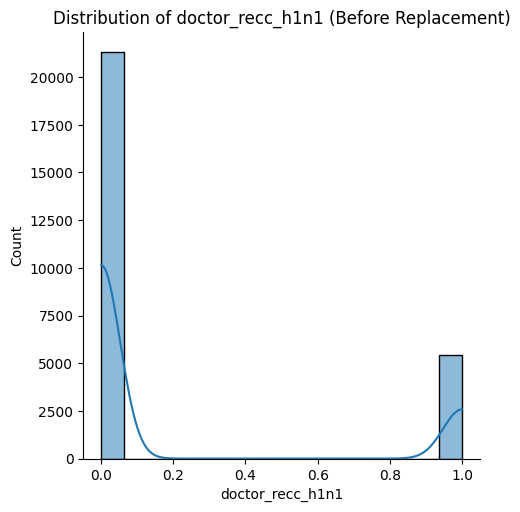

<Figure size 800x600 with 0 Axes>

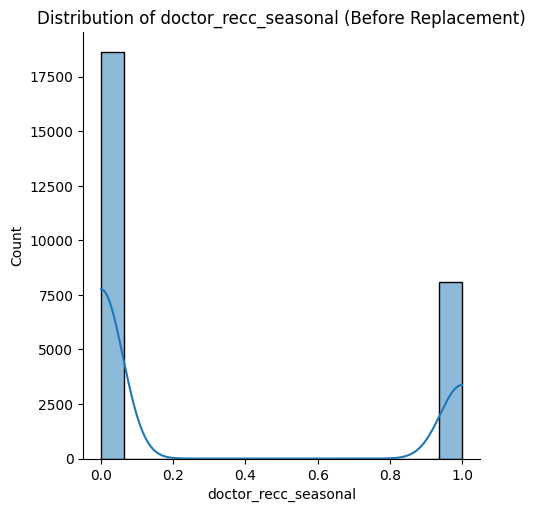

<Figure size 800x600 with 0 Axes>

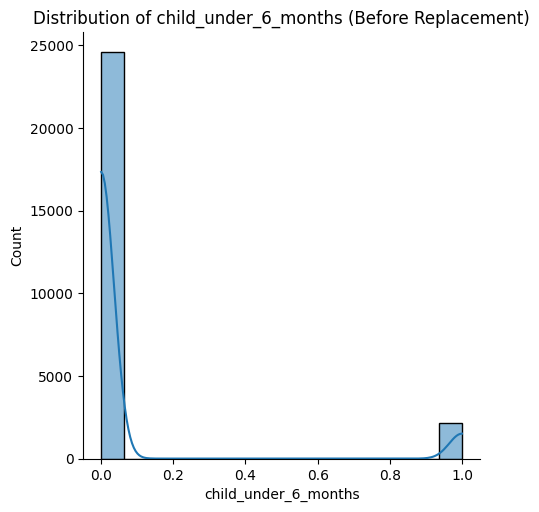

<Figure size 800x600 with 0 Axes>

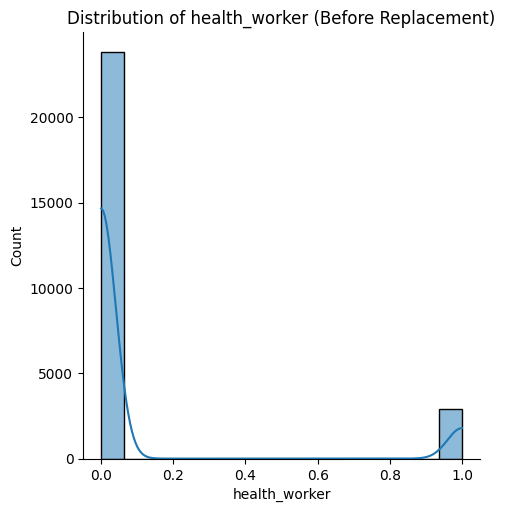

<Figure size 800x600 with 0 Axes>

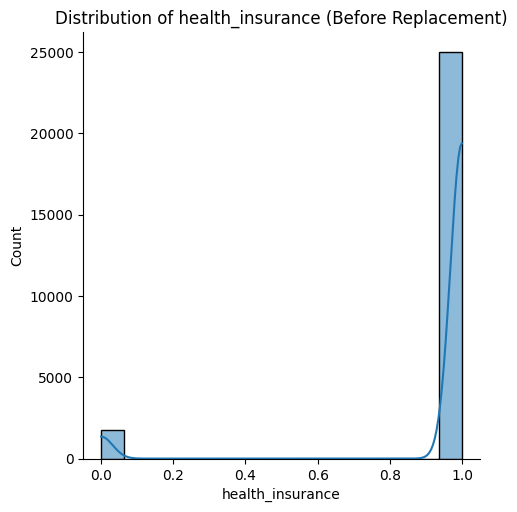

<Figure size 800x600 with 0 Axes>

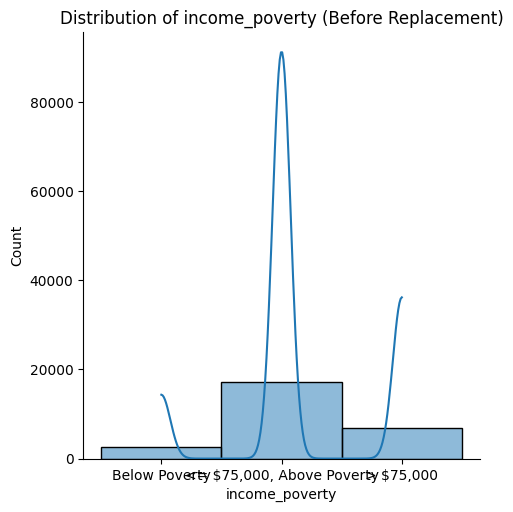

<Figure size 800x600 with 0 Axes>

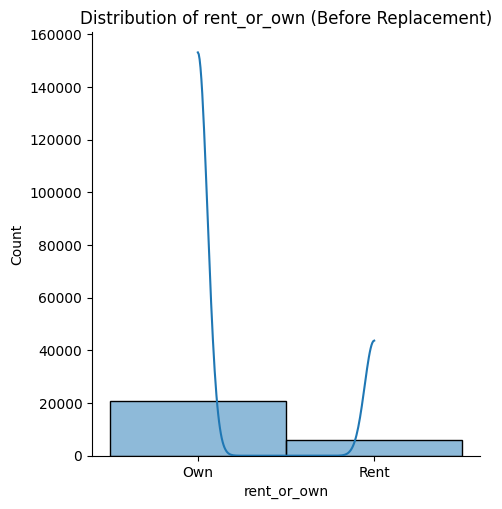

<Figure size 800x600 with 0 Axes>

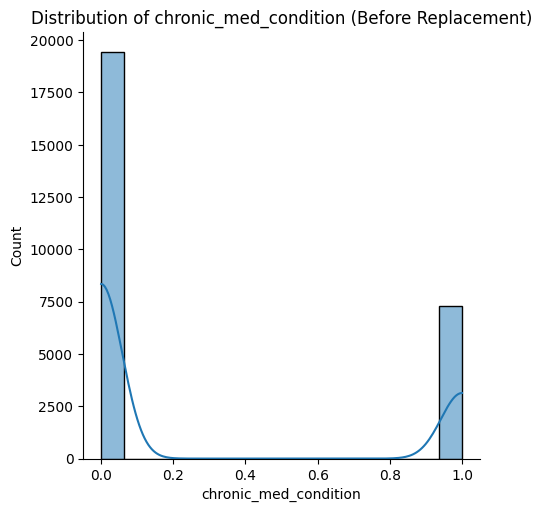

<Figure size 800x600 with 0 Axes>

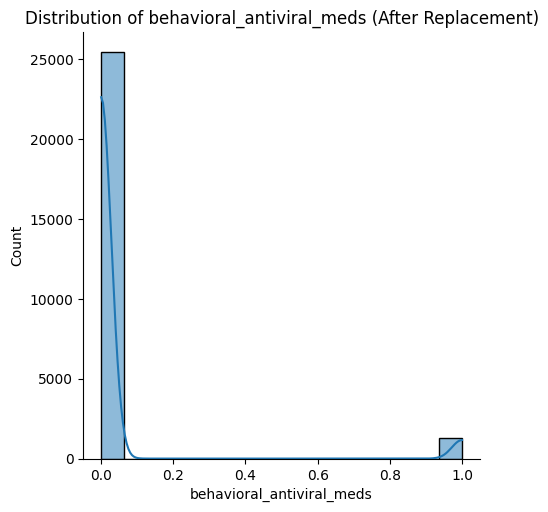

<Figure size 800x600 with 0 Axes>

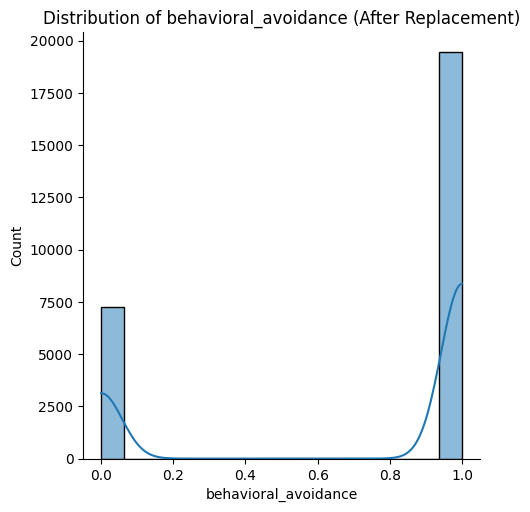

<Figure size 800x600 with 0 Axes>

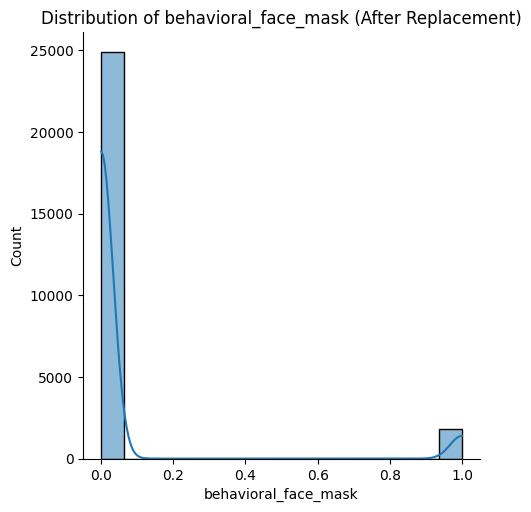

<Figure size 800x600 with 0 Axes>

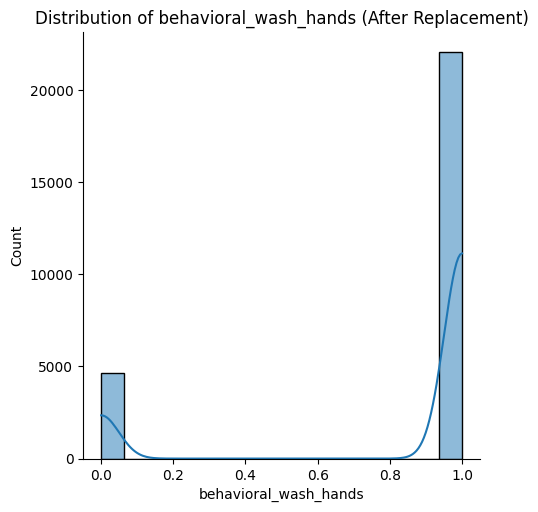

<Figure size 800x600 with 0 Axes>

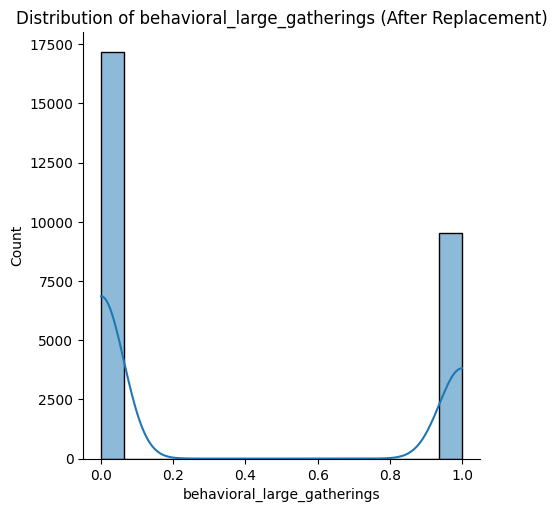

<Figure size 800x600 with 0 Axes>

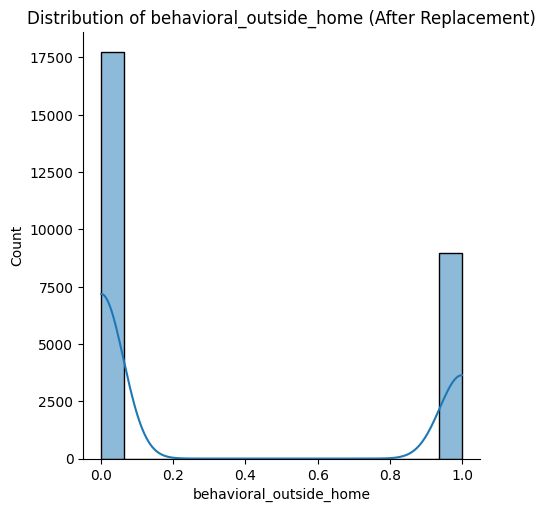

<Figure size 800x600 with 0 Axes>

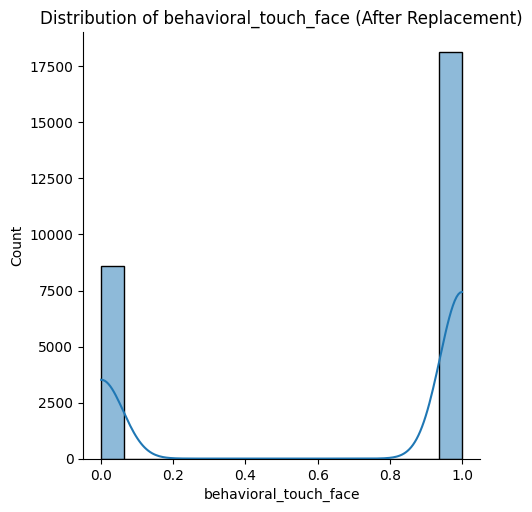

<Figure size 800x600 with 0 Axes>

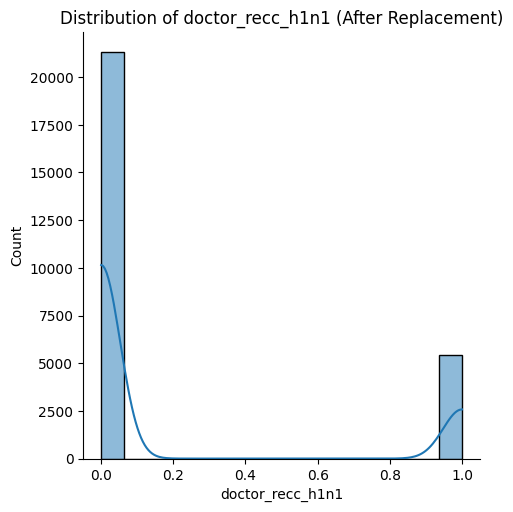

<Figure size 800x600 with 0 Axes>

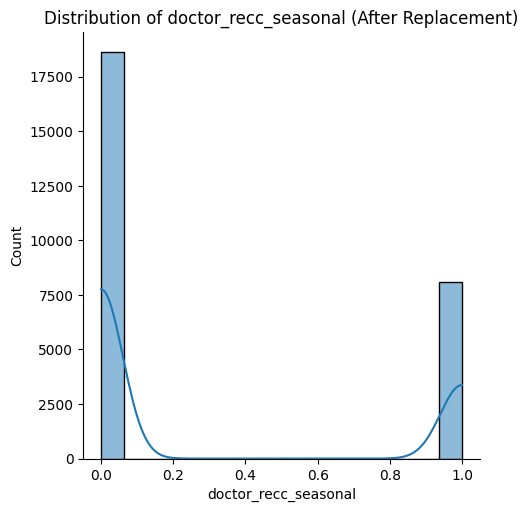

<Figure size 800x600 with 0 Axes>

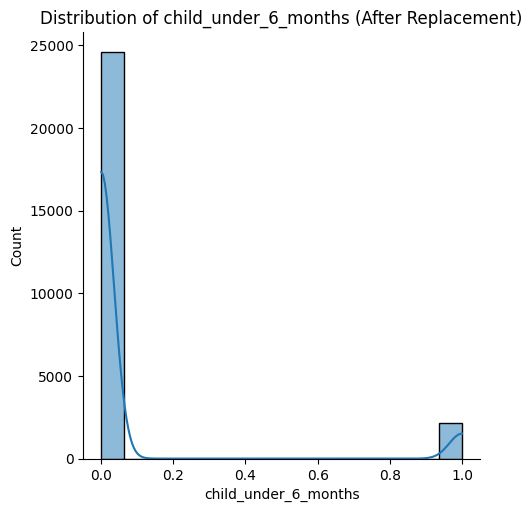

<Figure size 800x600 with 0 Axes>

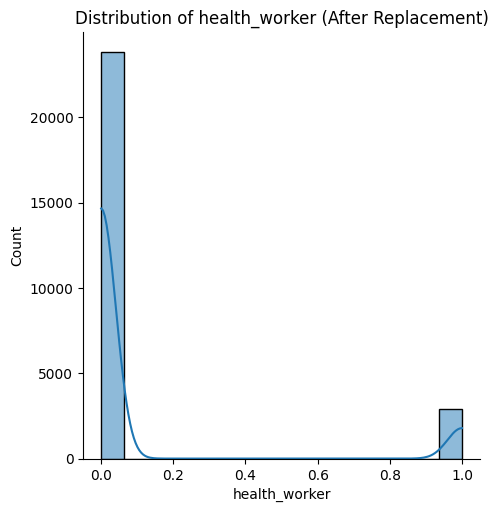

<Figure size 800x600 with 0 Axes>

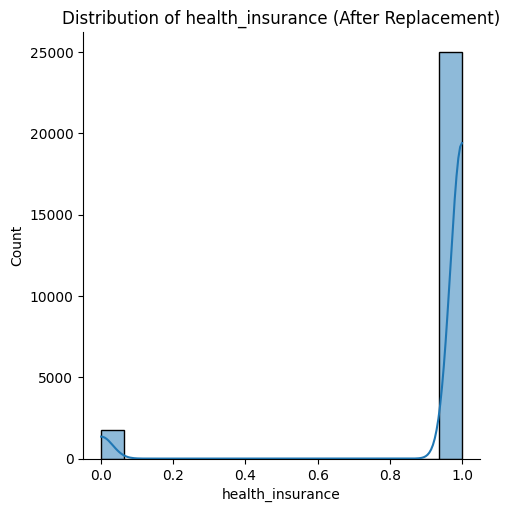

<Figure size 800x600 with 0 Axes>

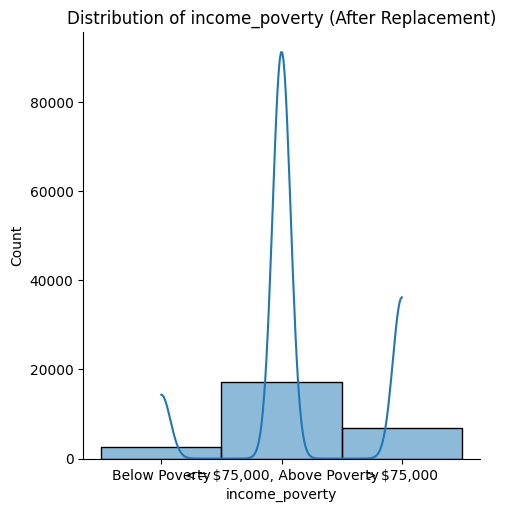

<Figure size 800x600 with 0 Axes>

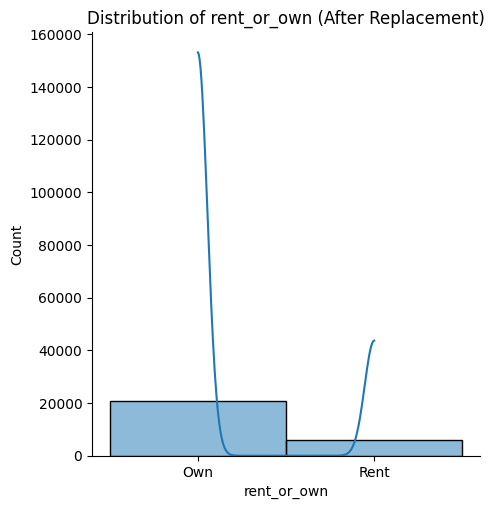

<Figure size 800x600 with 0 Axes>

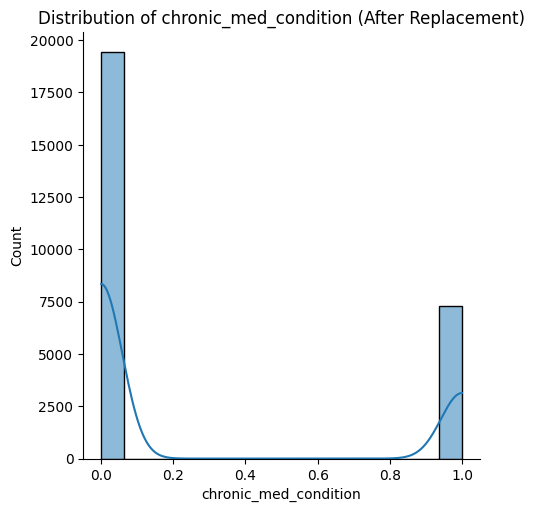

In [15]:
# Before replacement
for column in binary_cols:
  plt.figure(figsize=(8, 6))
  sns.displot(df_train_copy[column], kde=True)
  plt.title(f'Distribution of {column} (Before Replacement)')
  plt.show()


# Replace missing values with the mode for binary columns
for col in binary_cols:
  df_train_copy[col].fillna(df_train_copy[col].mode()[0], inplace=True)


# After replacement
for column in binary_cols:
  plt.figure(figsize=(8, 6))
  sns.displot(df_train_copy[column], kde=True)
  plt.title(f'Distribution of {column} (After Replacement)')
  plt.show()


In [16]:
# Replacing null values in the health_insurance column with 0
# This is assuming all those with a null value have no medical insurance

df_train_copy['health_insurance'].fillna(0, inplace=True)


**hhs_geo_region, employment_industry & employment_occupation Columns**



In [17]:
df_train_copy['employment_industry'].unique()

array([nan, 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [18]:
df_train_copy['hhs_geo_region'].unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [19]:
df_train_copy['employment_occupation'].unique()

array([nan, 'xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

Since the hhs_geo_region, employment industry & employment_occupation details are not well recorded we drop the two columns

In [20]:
# Droping the employment industry and employment occupation columns

df_train_copy = df_train_copy.drop(['employment_industry', 'employment_occupation','hhs_geo_region'], axis=1)


In [21]:
df_train_copy['h1n1_concern'].value_counts()

h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

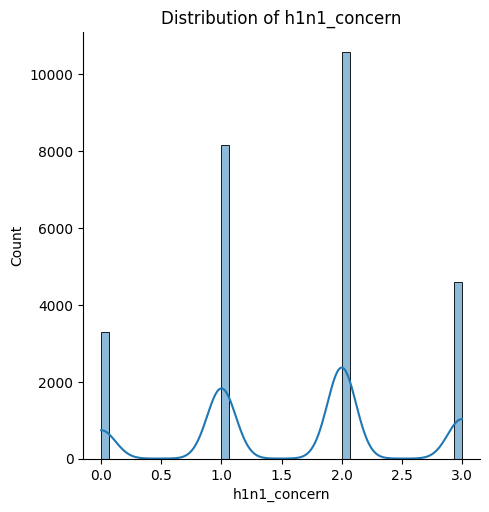

In [22]:
# A dist plot of the h1n1_concern column

plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_concern'], kde=True)
plt.title('Distribution of h1n1_concern')
plt.show()


<Figure size 800x600 with 0 Axes>

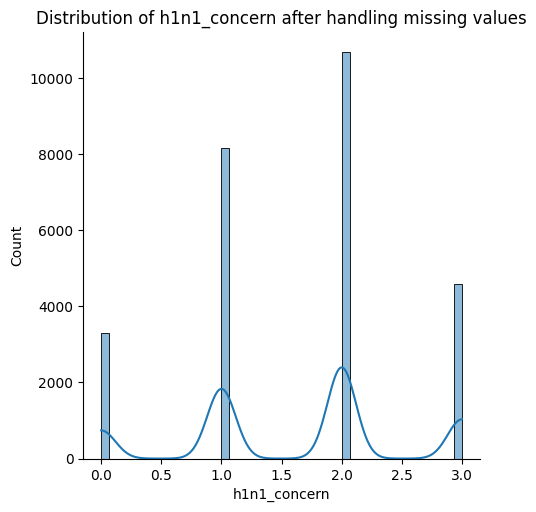

In [23]:
# Since 'h1n1_concern' is an ordinal feature representing the level of concern about H1N1,
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers, compared to the mean, and it preserves the distribution of the data better.

df_train_copy['h1n1_concern'].fillna(df_train_copy['h1n1_concern'].median(), inplace=True)

# You can also consider replacing missing values with the mode, but the median might be
# a slightly better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_concern'], kde=True)
plt.title('Distribution of h1n1_concern after handling missing values')
plt.show()


**h1n1_knowledge Column**

In [24]:
df_train_copy['h1n1_knowledge'].unique()

array([ 0.,  2.,  1., nan])

In [25]:
df_train_copy['h1n1_knowledge'].value_counts()

h1n1_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

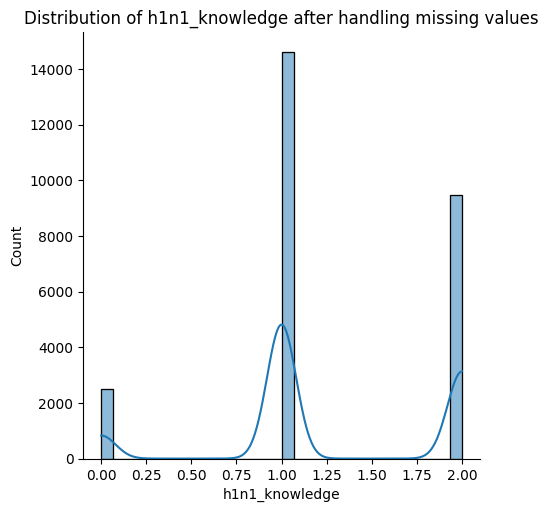

In [26]:
# Checking the distribution of the h1n1_knowledge column
plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_knowledge'], kde=True)
plt.title('Distribution of h1n1_knowledge after handling missing values')
plt.show()

<Figure size 800x600 with 0 Axes>

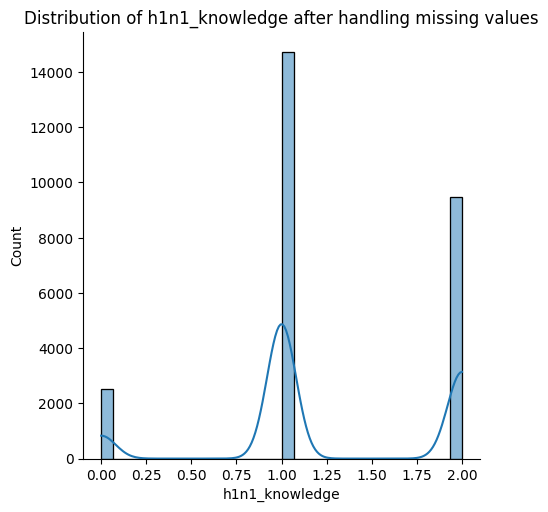

In [27]:
# Since 'h1n1_knowledge' is an ordinal feature representing the level of knowledge about H1N1,
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.

df_train_copy['h1n1_knowledge'].fillna(df_train_copy['h1n1_knowledge'].median(), inplace=True)

# You can also consider replacing missing values with the mode, but the median might be
# a slightly better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['h1n1_knowledge'], kde=True)
plt.title('Distribution of h1n1_knowledge after handling missing values')
plt.show()


In [28]:
# # Replacing the null values with either 0,1,2 randomly  while maintaining the distribution of the h1n1_knowledge column

# # Calculate the proportions of each unique value in the h1n1_knowledge column
# value_counts = df_train_copy['h1n1_knowledge'].value_counts(normalize=True)

# # Create a list of unique values and their corresponding probabilities
# unique_values = list(value_counts.index)
# probabilities = list(value_counts.values)

# # Replace NaN values with random choices from unique_values based on their probabilities
# df_train_copy['h1n1_knowledge'] = df_train_copy['h1n1_knowledge'].fillna(np.random.choice(unique_values, p=probabilities))


In [29]:
# # Using machine learning to replace missing values in df_train

# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Select only the numerical columns for imputation
# numerical_cols = df_train_copy.select_dtypes(include=np.number).columns

# # Create an IterativeImputer object
# imputer = IterativeImputer(max_iter=10, random_state=0)

# # Fit and transform the imputer on the numerical columns
# df_train_copy[numerical_cols] = imputer.fit_transform(df_train_copy[numerical_cols])

# # Now, df_train_copy has missing values in numerical columns filled using machine learning

# # You can further check for missing values:
# df_train_copy.isnull().sum()



**education column**

In [30]:
df_train_copy['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [31]:
df_train_copy['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

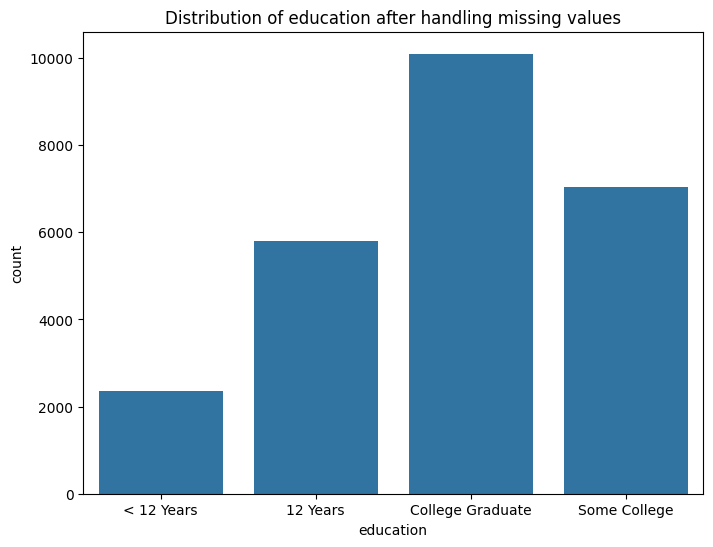

In [32]:
# Checking the distribution of the education column
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=df_train_copy)
plt.title('Distribution of education after handling missing values')
plt.show()

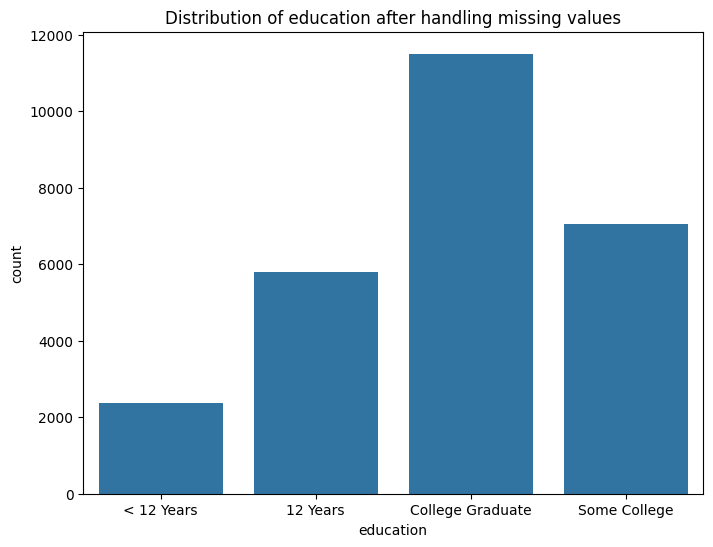

In [33]:
# Since 'education' is an ordinal feature representing the level of education,
# we can replace missing values with the mode of the column.
# The mode is the most frequent value, and it preserves the distribution of the data
# while handling missing entries.

df_train_copy['education'].fillna(df_train_copy['education'].mode()[0], inplace=True)

# Replacing missing values with the mode might be in this case to maintain the distribution,  since education column has a skewed distribution.
# Checking the distribution of the column again to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.countplot(x='education', data=df_train_copy)
plt.title('Distribution of education after handling missing values')
plt.show()


**marital_status column**

In [34]:
df_train_copy['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [35]:
df_train_copy['marital_status'].value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

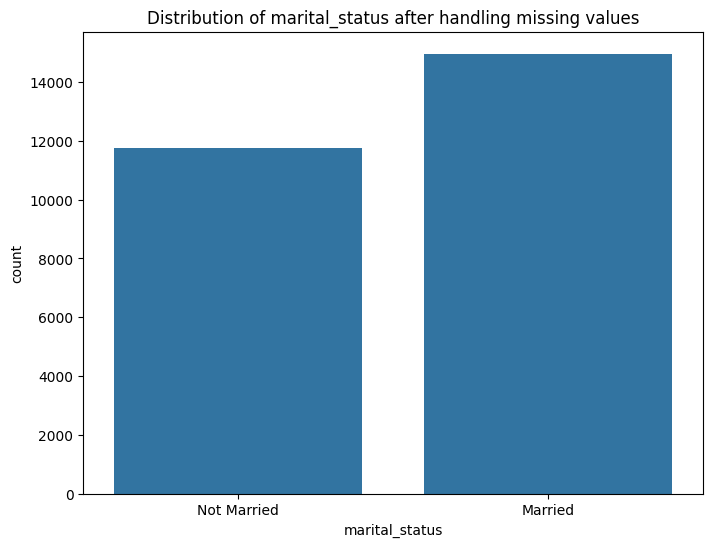

In [36]:
# Since 'marital_status' is a categorical feature representing the marital status of the respondent,
# we  replace missing values with the mode of the column since it preserves the distribution of the data
# while handling missing entries.

df_train_copy['marital_status'].fillna(df_train_copy['marital_status'].mode()[0], inplace=True)

# You can also consider replacing missing values with a new category, such as 'Unknown',
# but the mode might be a better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.countplot(x='marital_status', data=df_train_copy)
plt.title('Distribution of marital_status after handling missing values')
plt.show()


In [37]:
# # Replacing the nan values marital_status colum with either Married or Not Married using machine learning

# from sklearn.impute import KNNImputer

# # Select the 'marital_status' column and convert it to numerical values using one-hot encoding
# marital_status_encoded = pd.get_dummies(df_train_copy['marital_status'], dummy_na=True)

# # Concatenate the encoded 'marital_status' column with the original dataframe
# df_train_copy = pd.concat([df_train_copy, marital_status_encoded], axis=1)

# # Create a KNNImputer object
# imputer = KNNImputer(n_neighbors=5)

# # Fit and transform the imputer on the numerical columns, including the encoded 'marital_status'
# numerical_cols = df_train_copy.select_dtypes(include=np.number).columns
# df_train_copy[numerical_cols] = imputer.fit_transform(df_train_copy[numerical_cols])

# # Now, df_train_copy has missing values in 'marital_status' filled using KNN imputation

# # Inverse transform the encoded columns back to the original 'marital_status' column
# # Find the indices of the columns representing the encoded marital status
# encoded_marital_status_cols = [col for col in df_train_copy.columns if col in marital_status_encoded.columns]

# # Find the row indices where the 'marital_status' column was originally NaN
# nan_indices = df_train_copy['marital_status'].isnull()

# # Create a mapping from the numerical encoded values to the original categories
# mapping = {i: col for i, col in enumerate(marital_status_encoded.columns)}

# # Loop through the rows where 'marital_status' was NaN
# for index in df_train_copy[nan_indices].index:
#     # Find the encoded values for the current row
#     encoded_values = df_train_copy.loc[index, encoded_marital_status_cols].values

#     # Find the index of the maximum encoded value (most probable category)
#     predicted_category_index = np.argmax(encoded_values)

#     # Find the corresponding category from the mapping
#     predicted_category = mapping[predicted_category_index]

#     # Assign the predicted category to the 'marital_status' column
#     df_train_copy.loc[index, 'marital_status'] = predicted_category


# # Check if the 'marital_status' column has any missing values
# print(df_train_copy['marital_status'].isnull().sum())


**Ordinal Columns**

<Figure size 800x600 with 0 Axes>

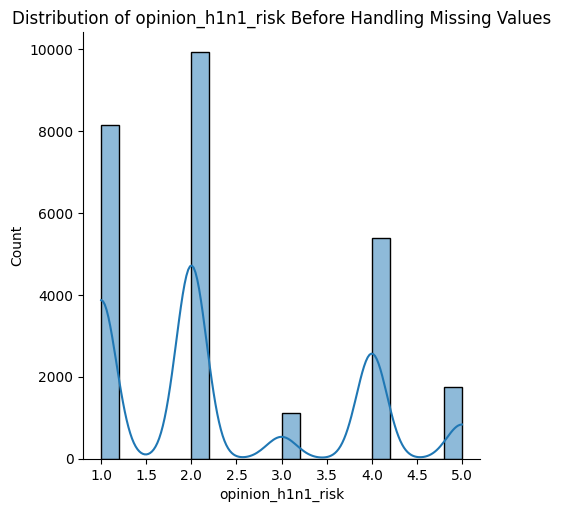

<Figure size 800x600 with 0 Axes>

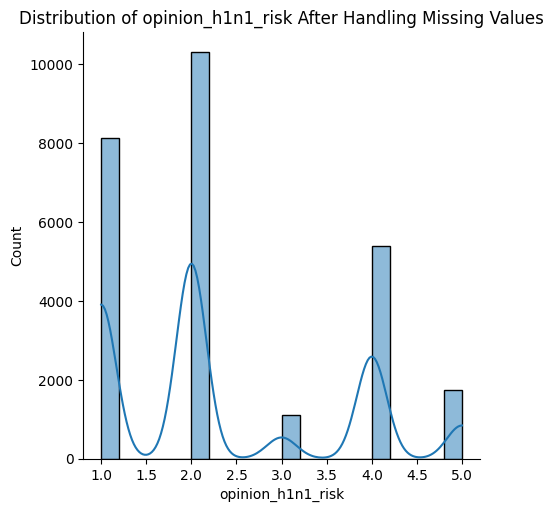

<Figure size 800x600 with 0 Axes>

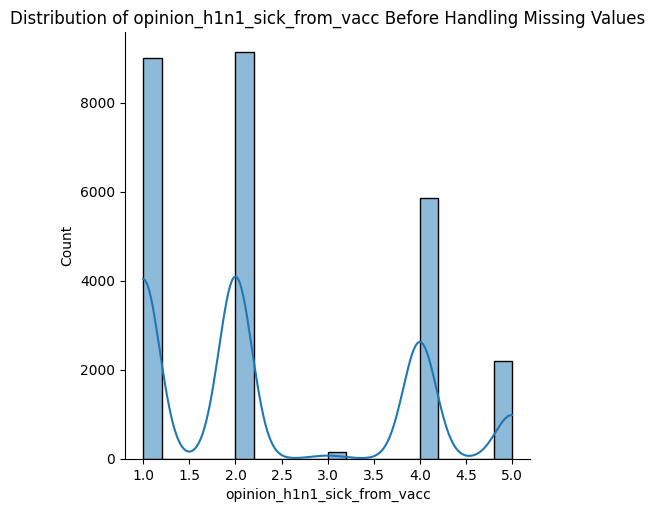

<Figure size 800x600 with 0 Axes>

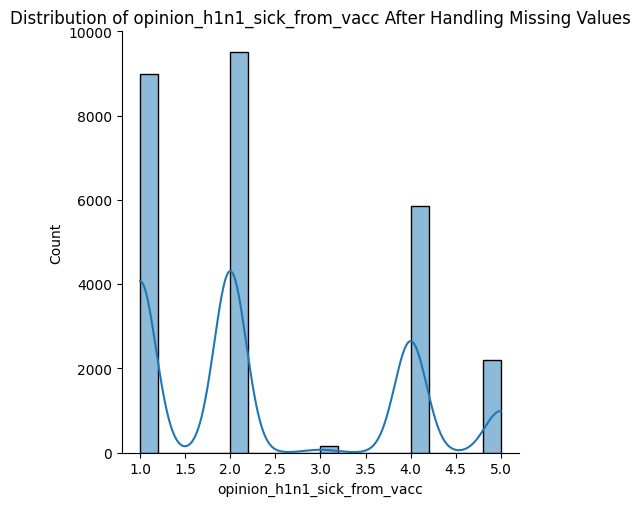

<Figure size 800x600 with 0 Axes>

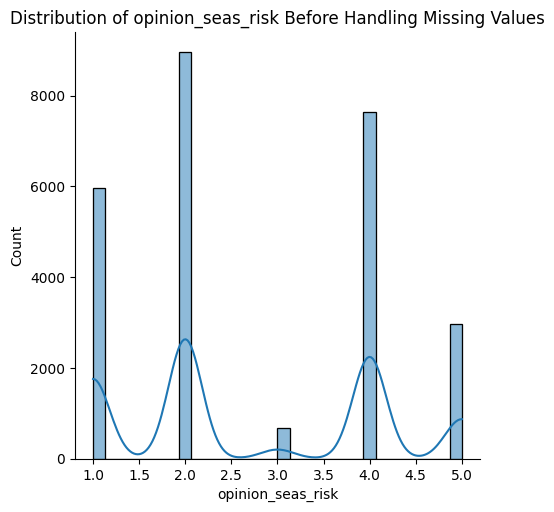

<Figure size 800x600 with 0 Axes>

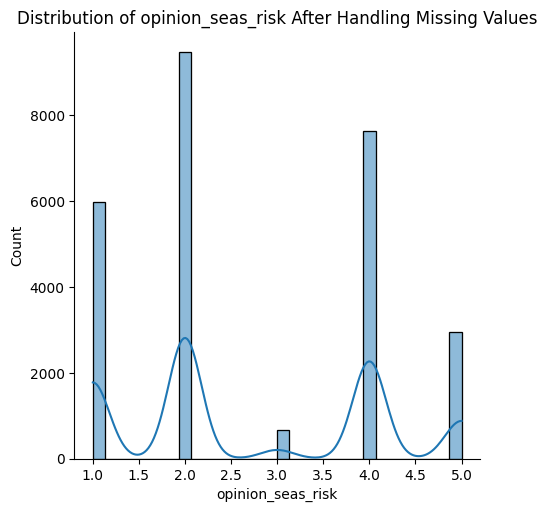

<Figure size 800x600 with 0 Axes>

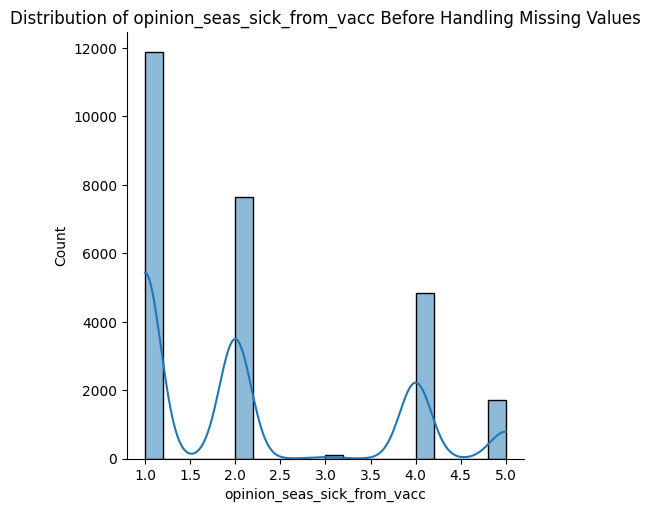

<Figure size 800x600 with 0 Axes>

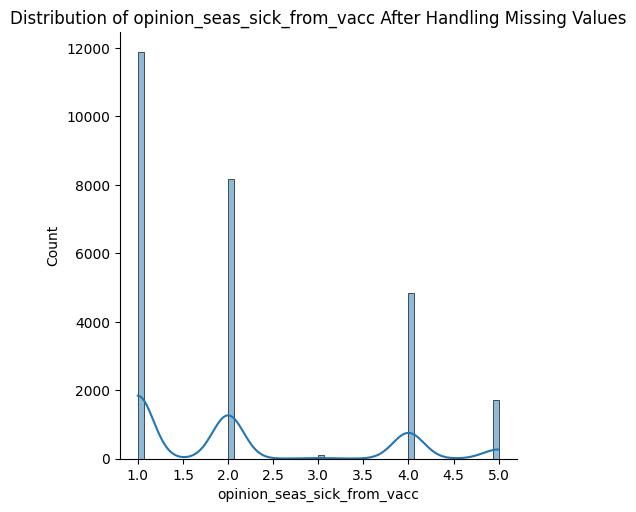

<Figure size 800x600 with 0 Axes>

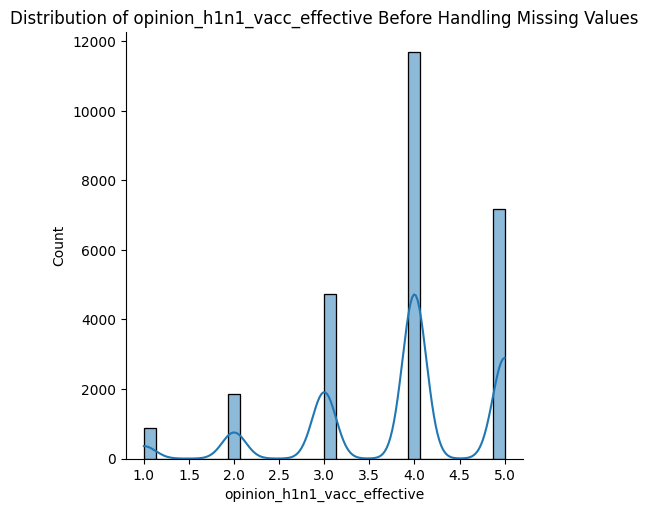

<Figure size 800x600 with 0 Axes>

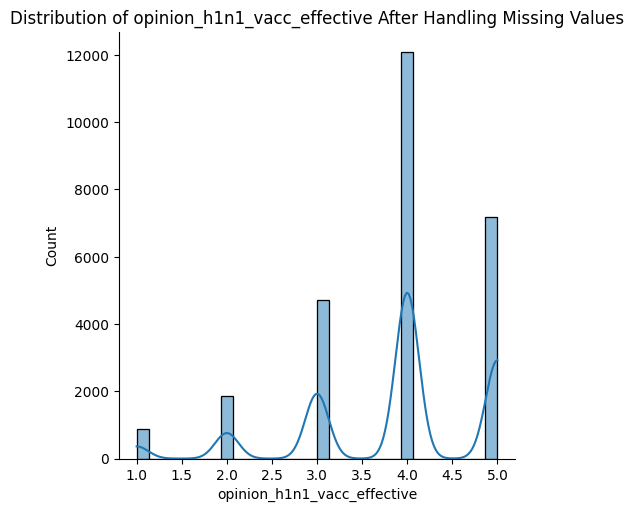

In [38]:
# opinion_h1n1_risk,opinion_seas_risk, opinion_seas_sick_from_vacc columns
# Since the above columns contain ordinal features representing the opinion
#  we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.

ordinal_cols = ['opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc','opinion_seas_risk', 'opinion_seas_sick_from_vacc','opinion_h1n1_vacc_effective']

for col in ordinal_cols:
  plt.figure(figsize=(8, 6))
  sns.displot(df_train_copy[col], kde=True)
  plt.title(f'Distribution of {col} Before Handling Missing Values')
  plt.show()

  df_train_copy[col].fillna(df_train_copy[col].median(), inplace=True)

  plt.figure(figsize=(8, 6))
  sns.displot(df_train_copy[col], kde=True)
  plt.title(f'Distribution of {col} After Handling Missing Values')
  plt.show()


**Employment Status Column**

In [39]:
df_train_copy['employment_status'].unique()


array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

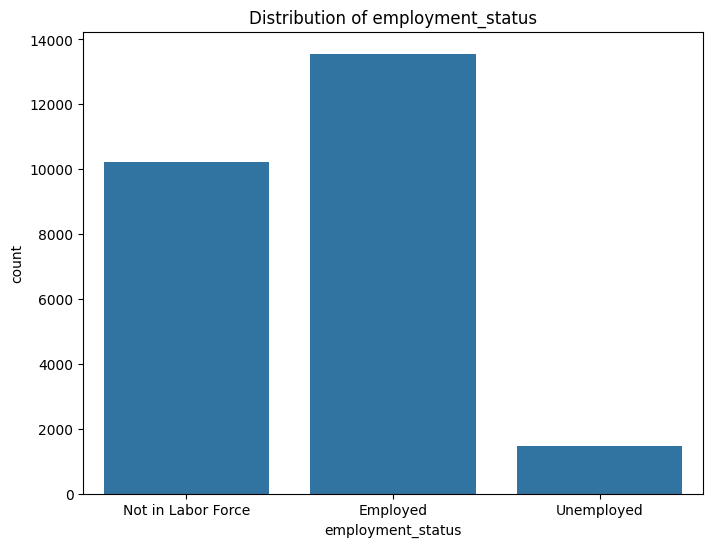

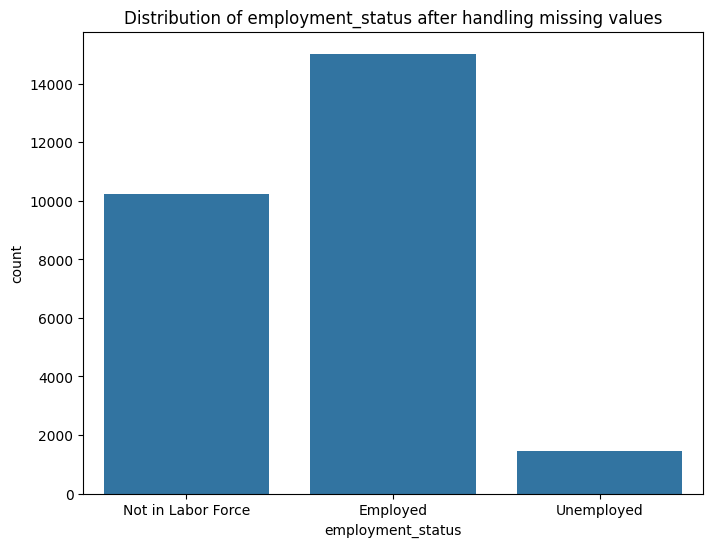

In [40]:

# Check the distribution of the employment_status column
plt.figure(figsize=(8, 6))
sns.countplot(x='employment_status', data=df_train_copy)
plt.title('Distribution of employment_status')
plt.show()

# Since 'employment_status' is a categorical feature representing the employment status of the respondent,
# we can replace missing values with the mode of the column.
# The mode is the most frequent value, and it preserves the distribution of the data
# while handling missing entries.

df_train_copy['employment_status'].fillna(df_train_copy['employment_status'].mode()[0], inplace=True)

# Checking the distribution of the column After replacing missing values to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.countplot(x='employment_status', data=df_train_copy)
plt.title('Distribution of employment_status after handling missing values')
plt.show()


**Household_adults column**

In [41]:
df_train_copy['household_adults'].unique()

array([ 0.,  2.,  1.,  3., nan])

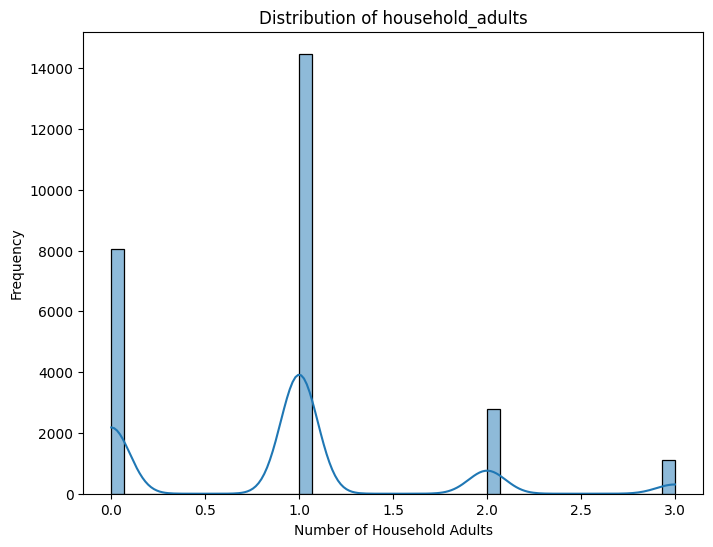

In [42]:
# Distribution graph for the household_adults column

plt.figure(figsize=(8, 6))
sns.histplot(df_train_copy['household_adults'], kde=True)
plt.title('Distribution of household_adults')
plt.xlabel('Number of Household Adults')
plt.ylabel('Frequency')
plt.show()


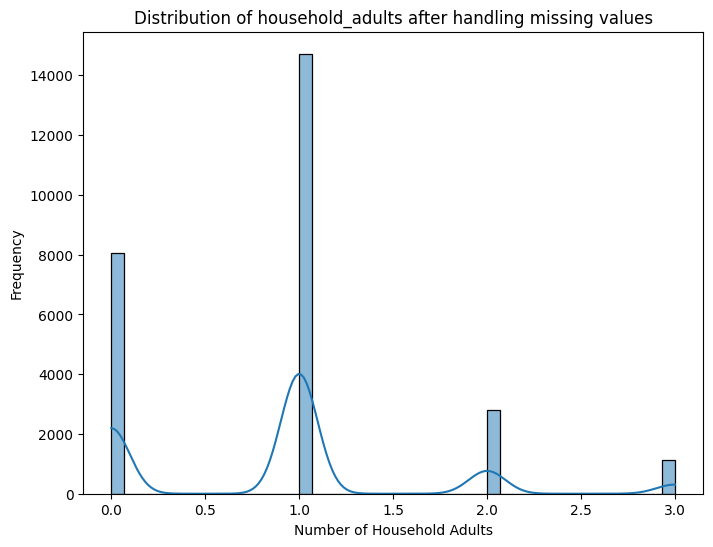

In [43]:
# Since 'household_adults' is a numerical feature representing the number of adults in the household,
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.

df_train_copy['household_adults'].fillna(df_train_copy['household_adults'].median(), inplace=True)

# You can also consider replacing missing values with the mode, but the median might be
# a slightly better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.histplot(df_train_copy['household_adults'], kde=True)
plt.title('Distribution of household_adults after handling missing values')
plt.xlabel('Number of Household Adults')
plt.ylabel('Frequency')
plt.show()


**household_children Column**

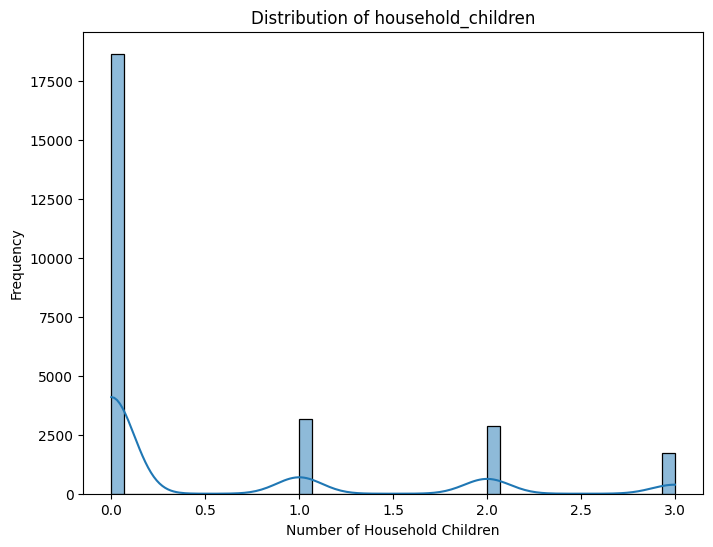

In [44]:
# Distribution graph for the household_children column

plt.figure(figsize=(8, 6))
sns.histplot(df_train_copy['household_children'], kde=True)
plt.title('Distribution of household_children')
plt.xlabel('Number of Household Children')
plt.ylabel('Frequency')
plt.show()

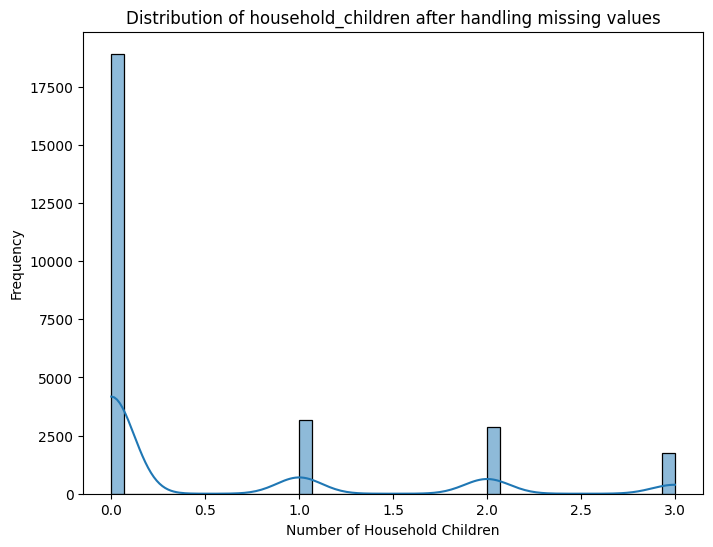

In [45]:
# Since 'household_children' is a numerical feature representing the number of children in the household,
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.

df_train_copy['household_children'].fillna(df_train_copy['household_children'].median(), inplace=True)

# You can also consider replacing missing values with the mode, but the median might be
# a slightly better choice in this case to maintain the distribution.

# After replacing missing values, you can check the distribution of the column again
# to ensure that the imputation didn't significantly alter the data.
plt.figure(figsize=(8, 6))
sns.histplot(df_train_copy['household_children'], kde=True)
plt.title('Distribution of household_children after handling missing values')
plt.xlabel('Number of Household Children')
plt.ylabel('Frequency')
plt.show()


In [46]:
# # Replace the nan values rent_or_own colum with either Own or Rent using machine learning

# from sklearn.impute import KNNImputer

# # Select the 'rent_or_own' column
# rent_or_own_column = df_train_copy['rent_or_own']

# # Convert categorical values to numerical using Label Encoding (optional, but can improve KNN performance)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# rent_or_own_encoded = le.fit_transform(rent_or_own_column.fillna('Unknown'))  # Fill NaN with 'Unknown' for now

# # Reshape the encoded data to fit the KNNImputer
# rent_or_own_encoded_reshaped = rent_or_own_encoded.reshape(-1, 1)

# # Create a KNNImputer object
# imputer = KNNImputer(n_neighbors=5)

# # Fit and transform the imputer on the encoded data
# rent_or_own_imputed = imputer.fit_transform(rent_or_own_encoded_reshaped)

# # Convert the imputed numerical values back to categorical
# rent_or_own_imputed_decoded = le.inverse_transform(rent_or_own_imputed.astype(int).flatten())

# # Replace the original 'rent_or_own' column with the imputed values
# df_train_copy['rent_or_own'] = rent_or_own_imputed_decoded

# # You can now check for missing values in the 'rent_or_own' column:
# print(df_train_copy['rent_or_own'].isnull().sum())


In [47]:
df_train_copy.isnull().sum()

respondent_id                    0
h1n1_concern                     0
h1n1_knowledge                   0
behavioral_antiviral_meds        0
behavioral_avoidance             0
behavioral_face_mask             0
behavioral_wash_hands            0
behavioral_large_gatherings      0
behavioral_outside_home          0
behavioral_touch_face            0
doctor_recc_h1n1                 0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
health_insurance                 0
opinion_h1n1_vacc_effective      0
opinion_h1n1_risk                0
opinion_h1n1_sick_from_vacc      0
opinion_seas_vacc_effective    462
opinion_seas_risk                0
opinion_seas_sick_from_vacc      0
age_group                        0
education                        0
race                             0
sex                              0
income_poverty                   0
marital_status                   0
rent_or_own                      0
employment_status                0
census_msa                       0
household_adults                 0
household_children               0
h1n1_vaccine                     0
seasonal_vaccine                 0
dtype: int64

<Figure size 800x600 with 0 Axes>

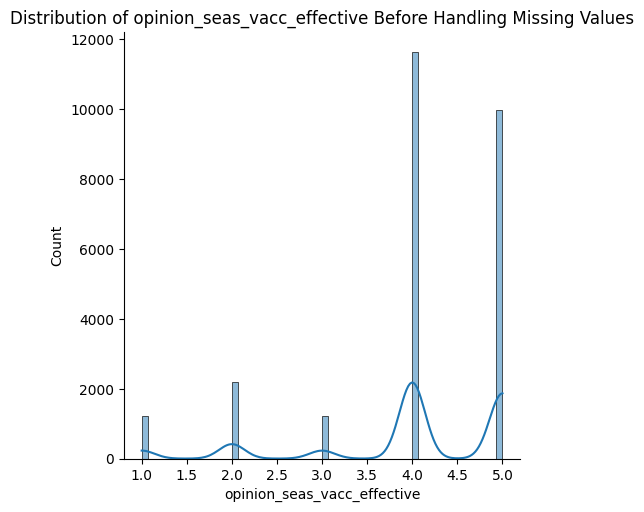

<Figure size 800x600 with 0 Axes>

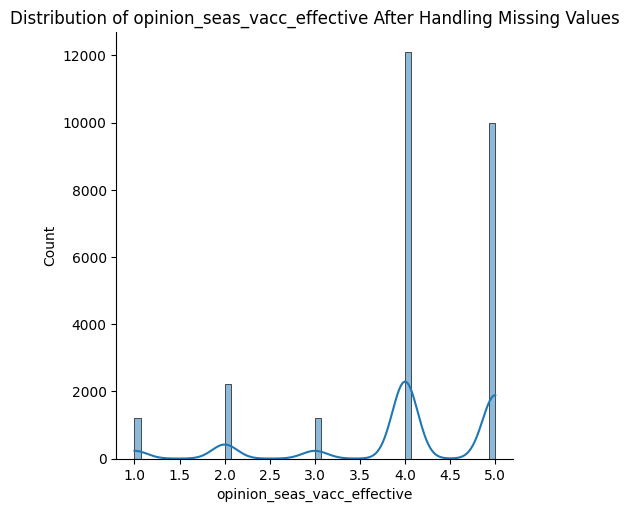

In [48]:
# Since 'opinion_seas_vacc_effective' is an ordinal feature representing the opinion
# we can replace missing values with the median of the column.
# The median is a robust measure of central tendency that is less affected by outliers
# compared to the mean, and it preserves the distribution of the data better.


plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['opinion_seas_vacc_effective'], kde=True)
plt.title(f'Distribution of opinion_seas_vacc_effective Before Handling Missing Values')
plt.show()

df_train_copy['opinion_seas_vacc_effective'].fillna(df_train_copy['opinion_seas_vacc_effective'].median(), inplace=True)


plt.figure(figsize=(8, 6))
sns.displot(df_train_copy['opinion_seas_vacc_effective'], kde=True)
plt.title(f'Distribution of opinion_seas_vacc_effective After Handling Missing Values')
plt.show()


In [49]:
# Displaying the first 5 row and all columns of our df_train_copy without any brakes

pd.set_option('display.expand_frame_repr', False)
print(df_train_copy.head(5))


   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  behavioral_outside_home  behavioral_touch_face  ...     sex             income_poverty  marital_status  rent_or_own   employment_status                census_msa  household_adults  household_children  h1n1_vaccine  seasonal_vaccine
0              0           1.0             0.0                        0.0                   0.0                   0.0                    0.0                          0.0                      1.0                    1.0  ...  Female              Below Poverty     Not Married          Own  Not in Labor Force                   Non-MSA               0.0                 0.0             0                 0
1              1           3.0             2.0                        0.0                   1.0                   0.0                    1.0                          0.0                      1.0

In [50]:
df_train_copy.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status               object
census_msa                      object
household_adults               float64
household_children             float64
h1n1_vaccine                     int64
seasonal_vaccine                 int64
dtype: object

In [51]:
df_train_copy['census_msa'].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

## Correlation Matrix

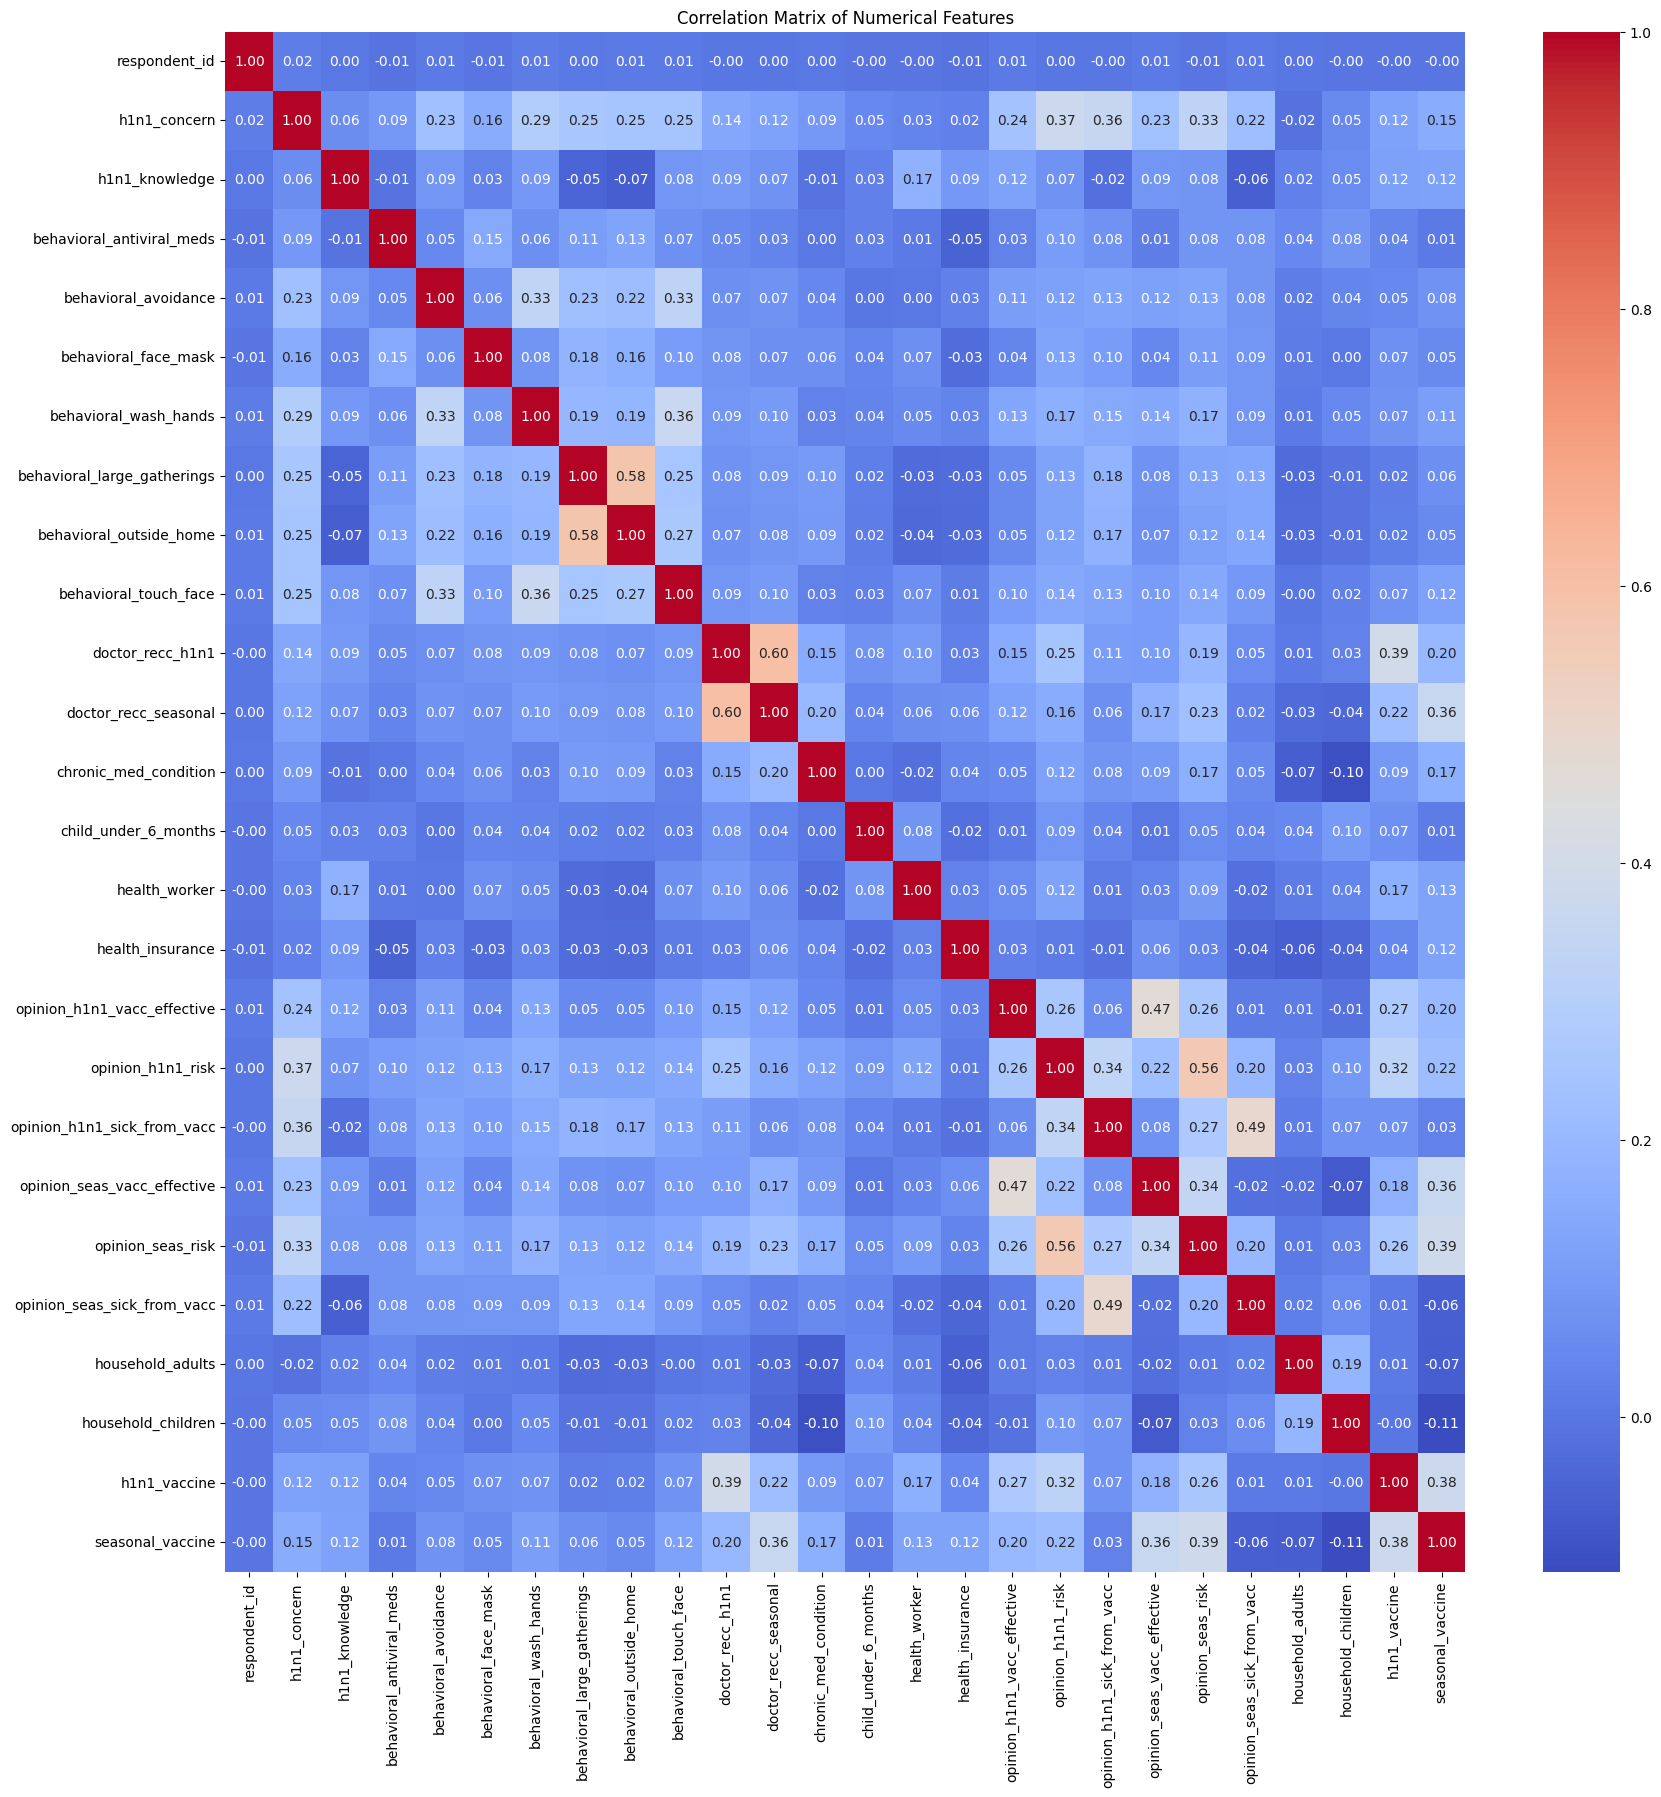

In [52]:
# Creting a heatmap of the numerical columns

# Select only numerical columns
numerical_cols = df_train_copy.select_dtypes(include=np.number).columns

# Create a correlation matrix
correlation_matrix = df_train_copy[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Correlation values

In [53]:
# Calculate the correlation matrix for numerical columns
numerical_cols = df_train_copy.select_dtypes(include=np.number).columns
correlation_matrix = df_train_copy[numerical_cols].corr()

# Get correlations with 'h1n1_vaccine'
h1n1_correlations = correlation_matrix['h1n1_vaccine'].drop('h1n1_vaccine') # Drop self-correlation
h1n1_correlations_sorted = h1n1_correlations.sort_values(ascending=False)

print("Correlations with h1n1_vaccine (descending):\n", h1n1_correlations_sorted)


# Get correlations with 'seasonal_vaccine'
seasonal_correlations = correlation_matrix['seasonal_vaccine'].drop('seasonal_vaccine') # Drop self-correlation
seasonal_correlations_sorted = seasonal_correlations.sort_values(ascending=False)

print("\nCorrelations with seasonal_vaccine (descending):\n", seasonal_correlations_sorted)

Correlations with h1n1_vaccine (descending):
 doctor_recc_h1n1               0.394086
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.320580
opinion_h1n1_vacc_effective    0.267352
opinion_seas_risk              0.255874
doctor_recc_seasonal           0.218976
opinion_seas_vacc_effective    0.177799
health_worker                  0.168056
h1n1_concern                   0.121574
h1n1_knowledge                 0.117771
chronic_med_condition          0.094360
opinion_h1n1_sick_from_vacc    0.074580
behavioral_wash_hands          0.074570
behavioral_touch_face          0.070855
behavioral_face_mask           0.070413
child_under_6_months           0.066712
behavioral_avoidance           0.046837
health_insurance               0.041891
behavioral_antiviral_meds      0.040226
behavioral_outside_home        0.022080
behavioral_large_gatherings    0.018089
opinion_seas_sick_from_vacc    0.008415
household_adults               0.007323
household_children            -0.0

In [54]:
df_train_copy.head()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  behavioral_large_gatherings  behavioral_outside_home  behavioral_touch_face  ...     sex             income_poverty  marital_status  rent_or_own   employment_status                census_msa  household_adults  household_children  h1n1_vaccine  seasonal_vaccine
0              0           1.0             0.0                        0.0                   0.0                   0.0                    0.0                          0.0                      1.0                    1.0  ...  Female              Below Poverty     Not Married          Own  Not in Labor Force                   Non-MSA               0.0                 0.0             0                 0
1              1           3.0             2.0                        0.0                   1.0                   0.0                    1.0                          0.0                      1.0                    1.0  ...    Male              Below Poverty     Not Married         Rent            Employed  MSA, Not Principle  City               0.0                 0.0             0                 1
2              2           1.0             1.0                        0.0                   1.0                   0.0                    0.0                          0.0                      0.0                    0.0  ...    Male  <= $75,000, Above Poverty     Not Married          Own            Employed  MSA, Not Principle  City               2.0                 0.0             0                 0
3              3           1.0             1.0                        0.0                   1.0                   0.0                    1.0                          1.0                      0.0                    0.0  ...  Female              Below Poverty     Not Married         Rent  Not in Labor Force       MSA, Principle City               0.0                 0.0             0                 1
4              4           2.0             1.0                        0.0                   1.0                   0.0                    1.0                          1.0                      0.0                    1.0  ...  Female  <= $75,000, Above Poverty         Married          Own            Employed  MSA, Not Principle  City               1.0                 0.0             0                 0

[5 rows x 35 columns]

# Modeling

In [70]:
#Importing relevant libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score


### One-Hot Encoding

In [55]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns (excluding those already handled or not relevant)
categorical_cols = ['education', 'marital_status', 'employment_status', 'rent_or_own', 'census_msa']  # Add other categorical columns here

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for easier handling

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(df_train_copy[categorical_cols])

# Creating a new DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded features with the original DataFrame (dropping the original categorical columns)
df_train_copy = pd.concat([df_train_copy.drop(categorical_cols, axis=1), encoded_df], axis=1)

## Standardizing our Numerical columns

In [56]:
# Standardize numerical columns

from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_cols = df_train_copy.select_dtypes(include=np.number).columns

# Exclude the target variables
numerical_cols = numerical_cols.drop(['h1n1_vaccine', 'seasonal_vaccine'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_train_copy[numerical_cols] = scaler.fit_transform(df_train_copy[numerical_cols])

## Logistic Regression Model

In [73]:
# Importing relevant Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Define features (X) and target variables (y)
X = df_train_copy.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = df_train_copy['h1n1_vaccine']
y_seasonal = df_train_copy['seasonal_vaccine']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

# Initialize and train the logistic regression models
model_h1n1 = LogisticRegression(max_iter=1000) # Increased max_iter
model_h1n1.fit(X_train_h1n1, y_train_h1n1)

model_seasonal = LogisticRegression(max_iter=1000) # Increased max_iter
model_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Make predictions
y_pred_h1n1 = model_h1n1.predict(X_test_h1n1)
y_pred_seasonal = model_seasonal.predict(X_test_seasonal)

# Evaluate the models
print("H1N1 Vaccine Prediction:")
print("Accuracy:", accuracy_score(y_test_h1n1, y_pred_h1n1))
print(classification_report(y_test_h1n1, y_pred_h1n1))


print("\nSeasonal Vaccine Prediction:")
print("Accuracy:", accuracy_score(y_test_seasonal, y_pred_seasonal))
print(classification_report(y_test_seasonal, y_pred_seasonal))

logreg_h1n1 = classification_report(y_test_h1n1, dt_y_pred_h1n1)
logreg_report_seasonal = classification_report(y_test_seasonal, dt_y_pred_seasonal)

H1N1 Vaccine Prediction:
Accuracy: 0.8420067390490453
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.71      0.43      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.79      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342


Seasonal Vaccine Prediction:
Accuracy: 0.7834144515162861
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2891
           1       0.78      0.74      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



## Decision Tree

In [74]:
# Importing Relevant Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Split data into training and testing sets
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)


# Initialize and train the decision tree models
dt_model_h1n1 = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_model_h1n1.fit(X_train_h1n1, y_train_h1n1)

dt_model_seasonal = DecisionTreeClassifier(random_state=42)
dt_model_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Make predictions
dt_y_pred_h1n1 = dt_model_h1n1.predict(X_test_h1n1)
dt_y_pred_seasonal = dt_model_seasonal.predict(X_test_seasonal)

# Evaluate the models
print("H1N1 Vaccine Prediction (Decision Tree):")
print("Accuracy:", accuracy_score(y_test_h1n1, dt_y_pred_h1n1))
print(classification_report(y_test_h1n1, dt_y_pred_h1n1))

print("\nSeasonal Vaccine Prediction (Decision Tree):")
print("Accuracy:", accuracy_score(y_test_seasonal, dt_y_pred_seasonal))
print(classification_report(y_test_seasonal, dt_y_pred_seasonal))

decision_tree_report_h1n1 = classification_report(y_test_h1n1, dt_y_pred_h1n1)
decision_tree_report_seasonal = classification_report(y_test_seasonal, dt_y_pred_seasonal)

H1N1 Vaccine Prediction (Decision Tree):
Accuracy: 0.7478472482216398
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4212
           1       0.41      0.43      0.42      1130

    accuracy                           0.75      5342
   macro avg       0.63      0.63      0.63      5342
weighted avg       0.75      0.75      0.75      5342


Seasonal Vaccine Prediction (Decision Tree):
Accuracy: 0.6772744290527892
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      2891
           1       0.65      0.66      0.65      2451

    accuracy                           0.68      5342
   macro avg       0.68      0.68      0.68      5342
weighted avg       0.68      0.68      0.68      5342



## Random Forest



In [75]:

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest models
rf_model_h1n1 = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model_h1n1.fit(X_train_h1n1, y_train_h1n1)

rf_model_seasonal = RandomForestClassifier(random_state=42)
rf_model_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Make predictions
rf_y_pred_h1n1 = rf_model_h1n1.predict(X_test_h1n1)
rf_y_pred_seasonal = rf_model_seasonal.predict(X_test_seasonal)

# Evaluate the models
print("H1N1 Vaccine Prediction (Random Forest):")
print("Accuracy:", accuracy_score(y_test_h1n1, rf_y_pred_h1n1))
print(classification_report(y_test_h1n1, rf_y_pred_h1n1))

print("\nSeasonal Vaccine Prediction (Random Forest):")
print("Accuracy:", accuracy_score(y_test_seasonal, rf_y_pred_seasonal))
print(classification_report(y_test_seasonal, rf_y_pred_seasonal))

random_forest_report_h1n1 = classification_report(y_test_h1n1, rf_y_pred_h1n1)
random_forest_report_seasonal = classification_report(y_test_seasonal, rf_y_pred_seasonal)

H1N1 Vaccine Prediction (Random Forest):
Accuracy: 0.8371396480718832
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      4212
           1       0.71      0.39      0.50      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.67      0.70      5342
weighted avg       0.82      0.84      0.82      5342


Seasonal Vaccine Prediction (Random Forest):
Accuracy: 0.7753650318232872
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2891
           1       0.76      0.74      0.75      2451

    accuracy                           0.78      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.78      0.78      0.78      5342



##  XGBoost

In [81]:
import xgboost as xgb

# Ensure all column names are strings
X_train_h1n1.columns = X_train_h1n1.columns.astype(str)
X_test_h1n1.columns = X_test_h1n1.columns.astype(str)
X_train_seasonal.columns = X_train_seasonal.columns.astype(str)
X_test_seasonal.columns = X_test_seasonal.columns.astype(str)

# Replace any disallowed characters in column names for both training and testing data
# This step addresses potential issues with characters like '<'
X_train_h1n1.columns = X_train_h1n1.columns.str.replace('[\[\]\<]', '', regex=True)
X_test_h1n1.columns = X_test_h1n1.columns.str.replace('[\[\]\<]', '', regex=True)
X_train_seasonal.columns = X_train_seasonal.columns.str.replace('[\[\]\<]', '', regex=True)
X_test_seasonal.columns = X_test_seasonal.columns.str.replace('[\[\]\<]', '', regex=True)


# Align columns between training and testing data for H1N1
# This ensures both datasets have the same features in the same order
X_test_h1n1 = X_test_h1n1[X_train_h1n1.columns]


# Model fitting and prediction (for both H1N1 and Seasonal Vaccines)
xgb_model_h1n1 = xgb.XGBClassifier(random_state=42)
xgb_model_h1n1.fit(X_train_h1n1, y_train_h1n1)  # Fit on H1N1 data

xgb_model_seasonal = xgb.XGBClassifier(random_state=42)
xgb_model_seasonal.fit(X_train_seasonal, y_train_seasonal)  # Fit on Seasonal data

# Make predictions
xgb_y_pred_h1n1 = xgb_model_h1n1.predict(X_test_h1n1)  # Use H1N1 model for H1N1 data
xgb_y_pred_seasonal = xgb_model_seasonal.predict(X_test_seasonal)  # Use Seasonal model for Seasonal data

# Evaluate the models
print("H1N1 Vaccine Prediction (XGBoost):")
print("Accuracy:", accuracy_score(y_test_h1n1, xgb_y_pred_h1n1))
print(classification_report(y_test_h1n1, xgb_y_pred_h1n1))

print("\nSeasonal Vaccine Prediction (XGBoost):")
print("Accuracy:", accuracy_score(y_test_seasonal, xgb_y_pred_seasonal))
#print(classification_report(y_test_seasonal, xgb_y_pred_seasonal))

# xgboost_report_h1n1 = classification_report(y_test_h1n1, xgb_y_pred_h1n1)
# xgboost_report_seasonal = classification_report(y_test_seasonal, xgb_y_pred_seasonal)


H1N1 Vaccine Prediction (XGBoost):
Accuracy: 0.8290902283788844
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4212
           1       0.64      0.44      0.52      1130

    accuracy                           0.83      5342
   macro avg       0.75      0.69      0.71      5342
weighted avg       0.81      0.83      0.82      5342


Seasonal Vaccine Prediction (XGBoost):
Accuracy: 0.7772369898914264


In [77]:
# logreg_report_h1n1 = """
#               precision    recall  f1-score   support

#            0       0.82      0.88      0.85      1569
#            1       0.79      0.70      0.74      1015

#     accuracy                           0.81      2584
#    macro avg       0.80      0.79      0.79      2584
# weighted avg       0.81      0.81      0.81      2584
# """

# decision_tree_report_h1n1 = """
#               precision    recall  f1-score   support

#            0       0.84      0.88      0.86      1569
#            1       0.81      0.75      0.78      1015

#     accuracy                           0.83      2584
#    macro avg       0.82      0.81      0.82      2584
# weighted avg       0.83      0.83      0.83      2584
# """

# random_forest_report_h1n1 = """
#               precision    recall  f1-score   support

#            0       0.85      0.89      0.87      1569
#            1       0.82      0.76      0.79      1015

#     accuracy                           0.84      2584
#    macro avg       0.83      0.82      0.83      2584
# weighted avg       0.84      0.84      0.84      2584
# """

# xgboost_report_h1n1 = """
#               precision    recall  f1-score   support

#            0       0.86      0.89      0.88      1569
#            1       0.83      0.79      0.81      1015

#     accuracy                           0.85      2584
#    macro avg       0.85      0.84      0.84      2584
# weighted avg       0.85      0.85      0.85      2584
# """


def get_metrics(report):
  lines = report.strip().split('\n')
  metrics = {}
  for line in lines[2:-3]:  # Skip header and totals
    parts = line.split()
    if parts: # Check if the line contains data
        class_label = parts[0]
        precision = float(parts[1])
        recall = float(parts[2])
        f1 = float(parts[3])
        metrics[class_label] = {'precision': precision, 'recall': recall, 'f1-score': f1}
  return metrics

# Extract the f1-score for class '1'
logreg_f1_h1n1 = get_metrics(logreg_report_h1n1)['1']['f1-score']
decision_tree_f1_h1n1 = get_metrics(decision_tree_report_h1n1)['1']['f1-score']
random_forest_f1_h1n1 = get_metrics(random_forest_report_h1n1)['1']['f1-score']
xgboost_f1_h1n1 = get_metrics(xgboost_report_h1n1)['1']['f1-score']


# Print metrics for h1n1
print("H1N1 F1-Scores:")
print("Logistic Regression:", logreg_f1_h1n1)
print("Decision Tree:", decision_tree_f1_h1n1)
print("Random Forest:", random_forest_f1_h1n1)
print("XGBoost:", xgboost_f1_h1n1)


# Repeat for seasonal_vaccine
#... (similar code for seasonal_vaccine metrics)

best_model = "XGBoost"  # Replace with the model name that has the highest f1-score based on your evaluation
print(f"\nThe best model based on F1-score is: {best_model}")

H1N1 F1-Scores:
Logistic Regression: 0.74
Decision Tree: 0.42
Random Forest: 0.5
XGBoost: 0.52

The best model based on F1-score is: XGBoost


In [62]:

from sklearn.metrics import precision_score, recall_score

# ... (Your existing code) ...

# Make predictions (example for XGBoost, repeat for other models)
xgb_y_pred_h1n1 = xgb_model_h1n1.predict(X_test_h1n1)
xgb_y_pred_seasonal = xgb_model_seasonal.predict(X_test_seasonal)

# Calculate precision and recall for H1N1
precision_h1n1_xgb = precision_score(y_test_h1n1, xgb_y_pred_h1n1)
recall_h1n1_xgb = recall_score(y_test_h1n1, xgb_y_pred_h1n1)

print(f"H1N1 XGBoost - Precision: {precision_h1n1_xgb:.4f}, Recall: {recall_h1n1_xgb:.4f}")


# Calculate precision and recall for Seasonal
precision_seasonal_xgb = precision_score(y_test_seasonal, xgb_y_pred_seasonal)
recall_seasonal_xgb = recall_score(y_test_seasonal, xgb_y_pred_seasonal)

print(f"Seasonal XGBoost - Precision: {precision_seasonal_xgb:.4f}, Recall: {recall_seasonal_xgb:.4f}")

# ... (Repeat the precision and recall calculations for the other models: Logistic Regression, Decision Tree, Random Forest)


# Example of how to store and compare metrics (expand this for all models and both targets)
model_metrics = {
    "XGBoost": {
        "h1n1": {"precision": precision_h1n1_xgb, "recall": recall_h1n1_xgb},
        "seasonal": {"precision": precision_seasonal_xgb, "recall": recall_seasonal_xgb},
    },
    # Add other models here...
}


# Find the best model based on a chosen metric (e.g., F1-score, precision, recall)
# Example: Choosing the model with the highest average precision across both targets

best_model = None
best_metric_value = -1

for model_name, metrics in model_metrics.items():
  average_precision = (metrics["h1n1"]["precision"] + metrics["seasonal"]["precision"]) / 2
  if average_precision > best_metric_value:
    best_metric_value = average_precision
    best_model = model_name

print(f"\nBest model based on average precision across targets: {best_model}")

H1N1 XGBoost - Precision: 0.6411, Recall: 0.4363
Seasonal XGBoost - Precision: 0.7617, Recall: 0.7487

Best model based on average precision across targets: XGBoost


## Hyperparameter Tuning

In [63]:
# Tuning our best model, XGBoost

In [64]:
import xgboost as xgb

# Ensure all column names are strings
X_train_h1n1.columns = X_train_h1n1.columns.astype(str)
X_test_h1n1.columns = X_test_h1n1.columns.astype(str)
X_train_seasonal.columns = X_train_seasonal.columns.astype(str)
X_test_seasonal.columns = X_test_seasonal.columns.astype(str)

# Replace any disallowed characters in column names for both training and testing data
# This step addresses potential issues with characters like '<'
X_train_h1n1.columns = X_train_h1n1.columns.str.replace('[\[\]\<]', '', regex=True)
X_test_h1n1.columns = X_test_h1n1.columns.str.replace('[\[\]\<]', '', regex=True)
X_train_seasonal.columns = X_train_seasonal.columns.str.replace('[\[\]\<]', '', regex=True)
X_test_seasonal.columns = X_test_seasonal.columns.str.replace('[\[\]\<]', '', regex=True)


# Align columns between training and testing data for H1N1
# This ensures both datasets have the same features in the same order
X_test_h1n1 = X_test_h1n1[X_train_h1n1.columns]


# Model fitting and prediction (for both H1N1 and Seasonal Vaccines)
xgb_model_h1n1 = xgb.XGBClassifier(random_state=42)
xgb_model_h1n1.fit(X_train_h1n1, y_train_h1n1)  # Fit on H1N1 data

xgb_model_seasonal = xgb.XGBClassifier(random_state=42)
xgb_model_seasonal.fit(X_train_seasonal, y_train_seasonal)  # Fit on Seasonal data

# Make predictions
xgb_y_pred_h1n1 = xgb_model_h1n1.predict(X_test_h1n1)  # Use H1N1 model for H1N1 data
xgb_y_pred_seasonal = xgb_model_seasonal.predict(X_test_seasonal)  # Use Seasonal model for Seasonal data

# Evaluate the models
print("H1N1 Vaccine Prediction (XGBoost):")
print("Accuracy:", accuracy_score(y_test_h1n1, xgb_y_pred_h1n1))
print(classification_report(y_test_h1n1, xgb_y_pred_h1n1))

print("\nSeasonal Vaccine Prediction (XGBoost):")
print("Accuracy:", accuracy_score(y_test_seasonal, xgb_y_pred_seasonal))
print(classification_report(y_test_seasonal, xgb_y_pred_seasonal))

H1N1 Vaccine Prediction (XGBoost):
Accuracy: 0.8290902283788844
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4212
           1       0.64      0.44      0.52      1130

    accuracy                           0.83      5342
   macro avg       0.75      0.69      0.71      5342
weighted avg       0.81      0.83      0.82      5342


Seasonal Vaccine Prediction (XGBoost):
Accuracy: 0.7772369898914264
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2891
           1       0.76      0.75      0.76      2451

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



In [67]:
!pip install --upgrade scikit-learn xgboost
!pip install --upgrade xgboost scikit-learn


In [84]:
# prompt: tune the xgboost model for better perfomance both accuracy and precision

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# warnings.filterwarnings('ignore')
# # Load your dataframe
# df_train_copy = pd.read_csv('training_set_features.csv')
# df_train_copy_labels = pd.read_csv('training_set_labels.csv')
# df_train_copy = pd.concat([df_train_copy,df_train_copy_labels],axis=1)
# df_train_copy.isnull().sum()
# # Impute missing values in 'opinion_seas_vacc_effective' with the median
# df_train_copy['opinion_seas_vacc_effective'].fillna(df_train_copy['opinion_seas_vacc_effective'].median(), inplace=True)

# # One-Hot Encoding
# categorical_cols = ['education', 'marital_status', 'employment_status', 'rent_or_own', 'census_msa']
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# encoded_features = encoder.fit_transform(df_train_copy[categorical_cols])
# encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
# df_train_copy = pd.concat([df_train_copy.drop(categorical_cols, axis=1), encoded_df], axis=1)

# # Standardizing Numerical Columns
# numerical_cols = df_train_copy.select_dtypes(include=np.number).columns
# numerical_cols = numerical_cols.drop(['h1n1_vaccine', 'seasonal_vaccine'])
# scaler = StandardScaler()
# df_train_copy[numerical_cols] = scaler.fit_transform(df_train_copy[numerical_cols])

# # Define features (X) and target variables (y)
# X = df_train_copy.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
# y_h1n1 = df_train_copy['h1n1_vaccine']
# y_seasonal = df_train_copy['seasonal_vaccine']

# # Split the data into training and testing sets
# X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
# X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

# # Ensure all column names are strings and handle special characters
# X_train_h1n1.columns = X_train_h1n1.columns.astype(str)
# X_test_h1n1.columns = X_test_h1n1.columns.astype(str)
# X_train_seasonal.columns = X_train_seasonal.columns.astype(str)
# X_test_seasonal.columns = X_test_seasonal.columns.astype(str)

# X_train_h1n1.columns = X_train_h1n1.columns.str.replace('[\[\]\<]', '', regex=True)
# X_test_h1n1.columns = X_test_h1n1.columns.str.replace('[\[\]\<]', '', regex=True)
# X_train_seasonal.columns = X_train_seasonal.columns.str.replace('[\[\]\<]', '', regex=True)
# X_test_seasonal.columns = X_test_seasonal.columns.str.replace('[\[\]\<]', '', regex=True)

# X_test_h1n1 = X_test_h1n1[X_train_h1n1.columns]
# X_test_seasonal = X_test_seasonal[X_train_seasonal.columns]
# XGBoost Hyperparameter Tuning for H1N1
param_grid_h1n1 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

xgb_model_h1n1 = xgb.XGBClassifier(random_state=42)
grid_search_h1n1 = GridSearchCV(estimator=xgb_model_h1n1, param_grid=param_grid_h1n1, scoring='f1', cv=3, verbose=2, n_jobs=-1)
grid_search_h1n1.fit(X_train_h1n1, y_train_h1n1)

best_xgb_model_h1n1 = grid_search_h1n1.best_estimator_
xgb_y_pred_h1n1_tuned = best_xgb_model_h1n1.predict(X_test_h1n1)

print("Tuned H1N1 Vaccine Prediction (XGBoost):")
print("Accuracy:", accuracy_score(y_test_h1n1, xgb_y_pred_h1n1_tuned))
print(classification_report(y_test_h1n1, xgb_y_pred_h1n1_tuned))
print("Best Hyperparameters:", grid_search_h1n1.best_params_)

# XGBoost Hyperparameter Tuning for Seasonal Vaccine
param_grid_seasonal = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

xgb_model_seasonal = xgb.XGBClassifier(random_state=42)
grid_search_seasonal = GridSearchCV(estimator=xgb_model_seasonal, param_grid=param_grid_seasonal, scoring='f1', cv=3, verbose=2, n_jobs=-1)
grid_search_seasonal.fit(X_train_seasonal, y_train_seasonal)

best_xgb_model_seasonal = grid_search_seasonal.best_estimator_
xgb_y_pred_seasonal_tuned = best_xgb_model_seasonal.predict(X_test_seasonal)

print("\nTuned Seasonal Vaccine Prediction (XGBoost):")
print("Accuracy:", accuracy_score(y_test_seasonal, xgb_y_pred_seasonal_tuned))
print(classification_report(y_test_seasonal, xgb_y_pred_seasonal_tuned))
print("Best Hyperparameters:", grid_search_seasonal.best_params_)

# Calculate and print precision and recall for the tuned models
precision_h1n1_xgb_tuned = precision_score(y_test_h1n1, xgb_y_pred_h1n1_tuned)
recall_h1n1_xgb_tuned = recall_score(y_test_h1n1, xgb_y_pred_h1n1_tuned)
print(f"\nTuned H1N1 XGBoost - Precision: {precision_h1n1_xgb_tuned:.4f}, Recall: {recall_h1n1_xgb_tuned:.4f}")

precision_seasonal_xgb_tuned = precision_score(y_test_seasonal, xgb_y_pred_seasonal_tuned)
recall_seasonal_xgb_tuned = recall_score(y_test_seasonal, xgb_y_pred_seasonal_tuned)
print(f"Tuned Seasonal XGBoost - Precision: {precision_seasonal_xgb_tuned:.4f}, Recall: {recall_seasonal_xgb_tuned:.4f}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [83]:
!pip install --upgrade scikit-learn xgboost

In [85]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

# Hyperparameter grid for H1N1 vaccine prediction
param_grid_h1n1 = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize XGBoost model with required parameters
xgb_model_h1n1 = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Perform Grid Search with cross-validation
grid_search_h1n1 = GridSearchCV(
    estimator=xgb_model_h1n1,
    param_grid=param_grid_h1n1,
    scoring='f1',
    cv=3,
    verbose=1,  # Reduced verbosity for cleaner output
    n_jobs=-1
)

# Fit Grid Search
grid_search_h1n1.fit(X_train_h1n1, y_train_h1n1)

# Get the best model
best_xgb_model_h1n1 = grid_search_h1n1.best_estimator_
xgb_y_pred_h1n1_tuned = best_xgb_model_h1n1.predict(X_test_h1n1)

# Print results
print("\nTuned H1N1 Vaccine Prediction (XGBoost):")
print("Accuracy:", accuracy_score(y_test_h1n1, xgb_y_pred_h1n1_tuned))
print(classification_report(y_test_h1n1, xgb_y_pred_h1n1_tuned))
print("Best Hyperparameters:", grid_search_h1n1.best_params_)

# Hyperparameter grid for seasonal vaccine prediction
param_grid_seasonal = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize XGBoost model for seasonal vaccine
xgb_model_seasonal = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Perform Grid Search for seasonal vaccine prediction
grid_search_seasonal = GridSearchCV(
    estimator=xgb_model_seasonal,
    param_grid=param_grid_seasonal,
    scoring='f1',
    cv=3,
    verbose=1,  # Reduced verbosity
    n_jobs=-1
)

# Fit Grid Search
grid_search_seasonal.fit(X_train_seasonal, y_train_seasonal)

# Get the best model
best_xgb_model_seasonal = grid_search_seasonal.best_estimator_
xgb_y_pred_seasonal_tuned = best_xgb_model_seasonal.predict(X_test_seasonal)

# Print results
print("\nTuned Seasonal Vaccine Prediction (XGBoost):")
print("Accuracy:", accuracy_score(y_test_seasonal, xgb_y_pred_seasonal_tuned))
print(classification_report(y_test_seasonal, xgb_y_pred_seasonal_tuned))
print("Best Hyperparameters:", grid_search_seasonal.best_params_)

# Calculate and print precision and recall for the tuned models
precision_h1n1_xgb_tuned = precision_score(y_test_h1n1, xgb_y_pred_h1n1_tuned, average='binary')
recall_h1n1_xgb_tuned = recall_score(y_test_h1n1, xgb_y_pred_h1n1_tuned, average='binary')
print(f"\nTuned H1N1 XGBoost - Precision: {precision_h1n1_xgb_tuned:.4f}, Recall: {recall_h1n1_xgb_tuned:.4f}")

precision_seasonal_xgb_tuned = precision_score(y_test_seasonal, xgb_y_pred_seasonal_tuned, average='binary')
recall_seasonal_xgb_tuned = recall_score(y_test_seasonal, xgb_y_pred_seasonal_tuned, average='binary')
print(f"Tuned Seasonal XGBoost - Precision: {precision_seasonal_xgb_tuned:.4f}, Recall: {recall_seasonal_xgb_tuned:.4f}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'